In [1]:
import os
import tensorflow as tf
from sklearn.metrics import r2_score


In [2]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/jegan/git/GooglePracticum


In [3]:
# Library Import
get_ipython().magic('matplotlib inline')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import shutil

# import the train test split
from sklearn.model_selection import train_test_split

# List to store results
# Stores the performance on test set.
model_results = []
model_name = []

# In[413]:


xf = pd.read_csv('input_model_weighted_average.csv')
xf.head()
xf.iloc[168:172]




,Unnamed: 0,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_HIGH,VIS_AVG,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM
168,168,2000,JAN,60.098523,24.919939,-5.750129,50.876803,18.079444,-19.152746,100.000000,...,11.091680,8.231682,0.061922,28.491682,9.674976,0.769395,4.527847,7.865567,3.129778,0.388589
169,169,2000,FEB,53.769218,31.870521,5.378496,44.864486,25.930720,-0.570920,100.000000,...,11.091680,7.687676,0.044134,28.925880,9.571381,287.022956,3.572751,4.803434,2.284139,0.385381
170,170,2000,MAY,84.325735,62.360525,37.698853,68.870647,51.653895,25.975416,98.988685,...,11.091680,8.828890,0.570830,30.201699,9.129810,4.098408,10.428558,0.000000,1.610892,4.896486
171,171,2000,JUN,88.622913,69.307943,52.228400,71.995094,60.166479,45.635832,99.068140,...,11.229015,9.513896,0.408795,27.953090,8.176592,3.466575,9.051719,0.000000,1.014093,4.340215


In [4]:
p_update = pd.read_csv('IL_Corn_Price_Updated_1986_2016.csv')
p_update['Period'] = pd.Categorical(p_update['Period'], ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

p_update['Discounted_Value'] = p_update['Value'] /1.000248 
#ps
#Risk-free rate for 1986 - 2016 : 9.34% ( 30-year Treasury Constant Maturity Rate at 1986 )
# Monthly discount rate = 1/1.000248 

p_update = p_update[['Year', 'Period','Value', 'Discounted_Value']]
price_updated = p_update.dropna(axis=0, how='any')
#price_updated = p_update[p_update.Period != 'MARKETING YEAR']

price_updated = price_updated.sort_values(['Year', 'Period'])
price_updated = price_updated.reset_index(drop=True)
#price_updated.iloc[168:174]

price_updated = price_updated[~((price_updated.Year == 2000) & ((price_updated.Period == 'MAR') | (price_updated.Period == 'APR')))]
price_updated = price_updated.reset_index(drop=True)
price_updated.iloc[168:172]


xf['Price'] = price_updated['Value']
xf['Discounted_Price'] = price_updated['Discounted_Value']
xf['State'] = 'IL'

# Reorder State Column
cols = xf.columns.tolist()
#cols

cols.insert(1, cols.pop(cols.index('State')))

xf = xf.reindex(columns = cols)
#df.drop('Unnamed: 0', axis=1, inplace=True)

w_avg_model_scaled = xf
w_avg_model_scaled



,Unnamed: 0,State,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,Price,Discounted_Price
0,0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393
5,5,IL,1986,JUN,93.180721,71.263159,47.746898,67.021368,55.502022,33.450048,...,0.950015,25.666101,8.317023,10.598875,8.135348,0.000000,12.649299,4.995009,2.45,2.449393
6,6,IL,1986,JUL,93.651100,75.325134,57.224505,71.740380,60.440695,41.882198,...,0.360831,30.924584,7.668664,11.201697,9.899297,0.000000,12.561325,6.286502,2.04,2.039494
7,7,IL,1986,AUG,88.032940,68.355756,43.240501,70.470204,53.535626,34.387899,...,0.123844,23.558382,6.839216,1.162475,6.987723,0.000000,11.848591,1.872076,1.77,1.769561
8,8,IL,1986,SEP,86.350515,66.418060,39.848014,66.092621,53.110278,30.557896,...,0.061922,31.473925,7.953490,6.651649,12.019534,0.109089,13.926898,5.663013,1.52,1.519623
9,9,IL,1986,OCT,74.910045,52.914618,29.721084,61.366736,42.196248,24.559025,...,0.103207,25.729013,7.975400,10.803140,9.754228,0.327268,16.250392,1.152677,1.39,1.389655


In [5]:
w_group = w_avg_model_scaled.groupby(["YEAR"])
year_list = w_avg_model_scaled["YEAR"].drop_duplicates()

for year in year_list:
    temp_df = w_group.get_group(year)
    #print(str(year) + ": " +str(len(temp_df["PRICE"].dropna())))

print(w_group.get_group(2000))


     Unnamed: 0 State  YEAR MONTH   TMP_HIGH    TMP_AVG    TMP_LOW    DP_HIGH  \
168         168    IL  2000   JAN  60.098523  24.919939  -5.750129  50.876803   
169         169    IL  2000   FEB  53.769218  31.870521   5.378496  44.864486   
170         170    IL  2000   MAY  84.325735  62.360525  37.698853  68.870647   
171         171    IL  2000   JUN  88.622913  69.307943  52.228400  71.995094   
172         172    IL  2000   JUL  87.461845  70.466481  51.066055  74.704992   
173         173    IL  2000   AUG  89.361775  71.781012  56.695409  74.533066   
174         174    IL  2000   SEP  90.167238  63.849101  36.705700  71.408262   
175         175    IL  2000   OCT  81.999760  54.605762  25.520160  62.377842   
176         176    IL  2000   NOV  74.379046  37.371940   9.233327  59.321373   
177         177    IL  2000   DEC  45.127840  19.968293  -7.283182  37.862855   

        DP_AVG     DP_LOW        ...          VIS_LOW  WIND_HIGH  WIND_AVG  \
168  18.079444 -19.152746     

In [6]:
# List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []

# Making all column names UPPER CASE --> inline with the weather data file
w_avg_model_scaled.columns = map(str.upper, w_avg_model_scaled.columns)

# rename UNNAMED:0 to INDEX
w_avg_model_scaled.rename(columns={'UNNAMED: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
w_avg_model_scaled = w_avg_model_scaled.drop('INDEX', axis=1)

w_avg_model_scaled.head()



,STATE,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,PRICE,DISCOUNTED_PRICE
0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393


In [7]:
w_avg_model_scaled.to_csv("final_input.csv")

In [8]:
col_names = list(w_avg_model_scaled)

# List all column types
#input_data.dtypes
print("Shape of Original data: {}".format(w_avg_model_scaled.shape) + "\n")

input_variables = w_avg_model_scaled.iloc[:,3:27]
print("Variables: " + str(input_variables.columns) + "\n")
print("Shape of variable data: {}".format(input_variables.shape) + "\n")

#print(input_data.iloc[:,26])
price = w_avg_model_scaled.iloc[:,25]
discounted_price = w_avg_model_scaled.iloc[:,26]



Shape of Original data: (370, 27)

Variables: Index(['TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW',
       'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG',
       'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG',
       'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_FOG',
       'NUM_DAYS_THNDRSTRM', 'PRICE', 'DISCOUNTED_PRICE'],
      dtype='object')

Shape of variable data: (370, 24)



In [9]:
lnn =  pd.read_csv('final_input.csv')
#rename UNNAMED:0 to INDEX
lnn.rename(columns={'Unnamed: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
lnn = lnn.drop('INDEX', axis=1)
lnn.head()

,STATE,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,PRICE,DISCOUNTED_PRICE
0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393


In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lstm_predictior_updated import lstm_model
#from lstm_predictior_updated import lstm_model, load_csvdata

import tensorflow as tf
from tensorflow.python.framework import dtypes
from tensorflow.contrib import learn as tflearn
from tensorflow.contrib import layers as tflayers
from tensorflow.contrib import rnn

from tensorflow.contrib.learn.python import SKCompat

LOG_DIR = ''
TIMESTEPS = 5
RNN_LAYERS = [{'num_units': 4}]
DENSE_LAYERS = [10, 10]
TRAINING_STEPS = 1000000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 10


In [11]:
def rnn_data(data, time_steps, labels=False):
    """
    creates new data frame based on previous observation
      * example:
        l = [1, 2, 3, 4, 5]
        time_steps = 2
        -> labels == False [[1, 2], [2, 3], [3, 4]] #Data frame for input with 2 timesteps
        -> labels == True [3, 4, 5] # labels for predicting the next timestep
    """
    rnn_df = []
    for i in range(len(data) - time_steps):
        if labels:
            try:
                rnn_df.append(data.iloc[i + time_steps].as_matrix())
            except AttributeError:
                rnn_df.append(data.iloc[i + time_steps])
        else:
            data_ = data.iloc[i: i + time_steps].as_matrix()
            rnn_df.append(data_ if len(data_.shape) > 1 else [[i] for i in data_])

    return np.array(rnn_df, dtype=np.float32)



def split_data(data, val_size=0.1, test_size=0.1):
    """
    splits data to training, validation and testing parts
    """
    ntest = int(round(len(data) * (1 - test_size)))
    nval = int(round(len(data.iloc[:ntest]) * (1 - val_size)))

    df_train, df_val, df_test = data.iloc[:nval], data.iloc[nval:ntest], data.iloc[ntest:]

    return df_train, df_val, df_test



def prepare_data(data, time_steps, labels=False, val_size=0.1, test_size=0.1):
    """
    Given the number of `time_steps` and some data,
    prepares training, validation and test data for an lstm cell.
    """
    df_train, df_val, df_test = split_data(data, val_size, test_size)
    return (rnn_data(df_train, time_steps, labels=labels),
            rnn_data(df_val, time_steps, labels=labels),
            rnn_data(df_test, time_steps, labels=labels))

def load_csvdata(rawdata, time_steps, seperate=False):
    data = rawdata
    #dataa = unraw

    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)
        
    #if not isinstance(dataa, pd.DataFrame):
    #    dataa = pd.DataFrame(dataa)

    train_x, val_x, test_x = prepare_data(data['a'] if seperate else data, time_steps)
    train_y, val_y, test_y = prepare_data(data['b'] if seperate else data, time_steps, labels=True)
    
    #train_x, val_x, test_x = prepare_data(data, time_steps)
    #train_y, val_y, test_y = prepare_data(dataa, time_steps, labels=True)
    return dict(train=train_x, val=val_x, test=test_x), dict(train=train_y, val=val_y, test=test_y)

def generate_data(fct, x, time_steps, seperate=False):
    """generates data with based on a function fct"""
    data = fct(x)
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)
    train_x, val_x, test_x = prepare_data(data['a'] if seperate else data, time_steps)
    train_y, val_y, test_y = prepare_data(data['b'] if seperate else data, time_steps, labels=True)
    return dict(train=train_x, val=val_x, test=test_x), dict(train=train_y, val=val_y, test=test_y)


In [12]:
 ##lnn.iloc[:,3:25]

In [13]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y %H:%M')

#rawdata = pd.read_csv("/Users/siddharthbhaduri/Desktop/Work/Fall-2017/Google-Project/Week9/RealMarketPriceDataPT.csv", 
#                  parse_dates={'timeline': ['date', '(UTC)']}, 
#                   index_col='timeline', date_parser=dateparse)
#r_data = lnn.iloc[:,3:25]
#un_data = lnn.iloc[:,26]

n_data = lnn.iloc[:, 26]

#X, y = load_csvdata(rawdata = r_data, unraw = un_data, time_steps = TIMESTEPS, seperate=False)
X, y = load_csvdata(rawdata = n_data, time_steps = TIMESTEPS, seperate=False)



In [14]:

regressor = SKCompat(learn.Estimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS),model_dir="log/"))

validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                     every_n_steps=PRINT_STEPS,
                                                     early_stopping_rounds=1000)

5
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11c9e2748>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'log/'}
Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.


In [15]:
print(X['train'])
print(y['train'])

#regressor.fit(X['train'], y['train'], monitors=[validation_monitor])
regressor.fit(X['train'], y['train'], monitors=[validation_monitor], batch_size=BATCH_SIZE, steps=TRAINING_STEPS)

[[[ 2.34941745]
  [ 2.37940979]
  [ 2.34941745]
  [ 2.33941984]
  [ 2.44939256]]

 [[ 2.37940979]
  [ 2.34941745]
  [ 2.33941984]
  [ 2.44939256]
  [ 2.44939256]]

 [[ 2.34941745]
  [ 2.33941984]
  [ 2.44939256]
  [ 2.44939256]
  [ 2.03949428]]

 ..., 
 [[ 3.50912976]
  [ 3.72907519]
  [ 4.04899597]
  [ 4.50888157]
  [ 4.61885452]]

 [[ 3.72907519]
  [ 4.04899597]
  [ 4.50888157]
  [ 4.61885452]
  [ 4.83879995]]

 [[ 4.04899597]
  [ 4.50888157]
  [ 4.61885452]
  [ 4.83879995]
  [ 4.93877506]]]
[[ 2.44939256]
 [ 2.03949428]
 [ 1.76956117]
 [ 1.51962316]
 [ 1.38965535]
 [ 1.46963549]
 [ 1.53961813]
 [ 1.52962065]
 [ 1.44964051]
 [ 1.50962555]
 [ 1.55961323]
 [ 1.7195735 ]
 [ 1.74956608]
 [ 1.65958846]
 [ 1.52962065]
 [ 1.52962065]
 [ 1.5996033 ]
 [ 1.67958343]
 [ 1.79955375]
 [ 1.80955124]
 [ 1.89952886]
 [ 1.90952647]
 [ 1.93951905]
 [ 2.02949667]
 [ 2.50937772]
 [ 2.7693131 ]
 [ 2.67933559]
 [ 2.62934804]
 [ 2.56936288]
 [ 2.54936767]
 [ 2.52937269]
 [ 2.61935043]
 [ 2.67933559]
 [ 2.6

INFO:tensorflow:global_step/sec: 476.397
INFO:tensorflow:loss = 0.0210852, step = 1901 (0.210 sec)
INFO:tensorflow:global_step/sec: 493.053
INFO:tensorflow:loss = 0.0140048, step = 2001 (0.203 sec)
INFO:tensorflow:global_step/sec: 496.32
INFO:tensorflow:loss = 0.00825977, step = 2101 (0.201 sec)
INFO:tensorflow:global_step/sec: 495.928
INFO:tensorflow:loss = 0.0974668, step = 2201 (0.202 sec)
INFO:tensorflow:global_step/sec: 491.724
INFO:tensorflow:loss = 0.00755589, step = 2301 (0.203 sec)
INFO:tensorflow:global_step/sec: 506.65
INFO:tensorflow:loss = 0.00410308, step = 2401 (0.197 sec)
INFO:tensorflow:global_step/sec: 497.401
INFO:tensorflow:loss = 0.0274424, step = 2501 (0.201 sec)
INFO:tensorflow:global_step/sec: 538.092
INFO:tensorflow:loss = 0.0110122, step = 2601 (0.186 sec)
INFO:tensorflow:global_step/sec: 465.562
INFO:tensorflow:loss = 0.02743, step = 2701 (0.215 sec)
INFO:tensorflow:global_step/sec: 464.322
INFO:tensorflow:loss = 0.112044, step = 2801 (0.215 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 549.946
INFO:tensorflow:loss = 0.00639958, step = 10201 (0.182 sec)
INFO:tensorflow:global_step/sec: 555.991
INFO:tensorflow:loss = 0.0110133, step = 10301 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.892
INFO:tensorflow:loss = 0.0177492, step = 10401 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.96
INFO:tensorflow:loss = 0.0244147, step = 10501 (0.179 sec)
INFO:tensorflow:global_step/sec: 558.896
INFO:tensorflow:loss = 0.0340646, step = 10601 (0.179 sec)
INFO:tensorflow:global_step/sec: 539.519
INFO:tensorflow:loss = 0.0208058, step = 10701 (0.185 sec)
INFO:tensorflow:global_step/sec: 556.282
INFO:tensorflow:loss = 0.0146167, step = 10801 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.226
INFO:tensorflow:loss = 0.0259692, step = 10901 (0.180 sec)
INFO:tensorflow:global_step/sec: 542.141
INFO:tensorflow:loss = 0.0645451, step = 11001 (0.184 sec)
INFO:tensorflow:global_step/sec: 531.29
INFO:tensorflow:loss = 0.0414683, step = 11101 (0.188 sec)
I

INFO:tensorflow:global_step/sec: 553.934
INFO:tensorflow:loss = 0.00925269, step = 18401 (0.181 sec)
INFO:tensorflow:global_step/sec: 558.02
INFO:tensorflow:loss = 0.0712683, step = 18501 (0.179 sec)
INFO:tensorflow:global_step/sec: 557.927
INFO:tensorflow:loss = 0.0229947, step = 18601 (0.179 sec)
INFO:tensorflow:global_step/sec: 560.136
INFO:tensorflow:loss = 0.00566465, step = 18701 (0.179 sec)
INFO:tensorflow:global_step/sec: 558.84
INFO:tensorflow:loss = 0.0137876, step = 18801 (0.179 sec)
INFO:tensorflow:global_step/sec: 557.265
INFO:tensorflow:loss = 0.0202334, step = 18901 (0.179 sec)
INFO:tensorflow:global_step/sec: 554.238
INFO:tensorflow:loss = 0.0116423, step = 19001 (0.180 sec)
INFO:tensorflow:global_step/sec: 546.463
INFO:tensorflow:loss = 0.0293509, step = 19101 (0.183 sec)
INFO:tensorflow:global_step/sec: 554.97
INFO:tensorflow:loss = 0.0959773, step = 19201 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.098
INFO:tensorflow:loss = 0.0289604, step = 19301 (0.179 sec)
I

INFO:tensorflow:global_step/sec: 462.961
INFO:tensorflow:loss = 0.045547, step = 26601 (0.216 sec)
INFO:tensorflow:global_step/sec: 382.754
INFO:tensorflow:loss = 0.00652651, step = 26701 (0.261 sec)
INFO:tensorflow:global_step/sec: 550.84
INFO:tensorflow:loss = 0.0147986, step = 26801 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.04
INFO:tensorflow:loss = 0.0268955, step = 26901 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.494
INFO:tensorflow:loss = 0.0172986, step = 27001 (0.180 sec)
INFO:tensorflow:global_step/sec: 549.964
INFO:tensorflow:loss = 0.040626, step = 27101 (0.182 sec)
INFO:tensorflow:global_step/sec: 537.813
INFO:tensorflow:loss = 0.00786383, step = 27201 (0.186 sec)
INFO:tensorflow:global_step/sec: 552.022
INFO:tensorflow:loss = 0.0208703, step = 27301 (0.181 sec)
INFO:tensorflow:global_step/sec: 541.671
INFO:tensorflow:loss = 0.0354915, step = 27401 (0.185 sec)
INFO:tensorflow:global_step/sec: 555.454
INFO:tensorflow:loss = 0.023876, step = 27501 (0.180 sec)
INF

INFO:tensorflow:global_step/sec: 537.49
INFO:tensorflow:loss = 0.0528815, step = 34801 (0.186 sec)
INFO:tensorflow:global_step/sec: 548.297
INFO:tensorflow:loss = 0.0126043, step = 34901 (0.182 sec)
INFO:tensorflow:global_step/sec: 526.784
INFO:tensorflow:loss = 0.00327549, step = 35001 (0.190 sec)
INFO:tensorflow:global_step/sec: 546.888
INFO:tensorflow:loss = 0.00775851, step = 35101 (0.183 sec)
INFO:tensorflow:global_step/sec: 560.553
INFO:tensorflow:loss = 0.0181176, step = 35201 (0.178 sec)
INFO:tensorflow:global_step/sec: 554.631
INFO:tensorflow:loss = 0.00898779, step = 35301 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.078
INFO:tensorflow:loss = 0.0219691, step = 35401 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.112
INFO:tensorflow:loss = 0.0108242, step = 35501 (0.182 sec)
INFO:tensorflow:global_step/sec: 549.565
INFO:tensorflow:loss = 0.0367549, step = 35601 (0.182 sec)
INFO:tensorflow:global_step/sec: 521.519
INFO:tensorflow:loss = 0.0165449, step = 35701 (0.192 sec

INFO:tensorflow:global_step/sec: 548.709
INFO:tensorflow:loss = 0.00464738, step = 43001 (0.182 sec)
INFO:tensorflow:global_step/sec: 543.954
INFO:tensorflow:loss = 0.0127111, step = 43101 (0.184 sec)
INFO:tensorflow:global_step/sec: 537.063
INFO:tensorflow:loss = 0.0449863, step = 43201 (0.186 sec)
INFO:tensorflow:global_step/sec: 548.045
INFO:tensorflow:loss = 0.011291, step = 43301 (0.182 sec)
INFO:tensorflow:global_step/sec: 531.993
INFO:tensorflow:loss = 0.00825535, step = 43401 (0.188 sec)
INFO:tensorflow:global_step/sec: 544.47
INFO:tensorflow:loss = 0.00588838, step = 43501 (0.184 sec)
INFO:tensorflow:global_step/sec: 533.134
INFO:tensorflow:loss = 0.0220464, step = 43601 (0.188 sec)
INFO:tensorflow:global_step/sec: 543.454
INFO:tensorflow:loss = 0.0208598, step = 43701 (0.184 sec)
INFO:tensorflow:global_step/sec: 532.275
INFO:tensorflow:loss = 0.00976518, step = 43801 (0.188 sec)
INFO:tensorflow:global_step/sec: 536.607
INFO:tensorflow:loss = 0.0532019, step = 43901 (0.186 sec

INFO:tensorflow:global_step/sec: 551.083
INFO:tensorflow:loss = 0.0238595, step = 51201 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.855
INFO:tensorflow:loss = 0.0368532, step = 51301 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.639
INFO:tensorflow:loss = 0.0212938, step = 51401 (0.181 sec)
INFO:tensorflow:global_step/sec: 557.351
INFO:tensorflow:loss = 0.032145, step = 51501 (0.179 sec)
INFO:tensorflow:global_step/sec: 545.539
INFO:tensorflow:loss = 0.00756954, step = 51601 (0.183 sec)
INFO:tensorflow:global_step/sec: 554.306
INFO:tensorflow:loss = 0.0205847, step = 51701 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.469
INFO:tensorflow:loss = 0.00550336, step = 51801 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.322
INFO:tensorflow:loss = 0.0235209, step = 51901 (0.180 sec)
INFO:tensorflow:global_step/sec: 562.508
INFO:tensorflow:loss = 0.00822891, step = 52001 (0.178 sec)
INFO:tensorflow:global_step/sec: 539.537
INFO:tensorflow:loss = 0.00889487, step = 52101 (0.185 se

INFO:tensorflow:global_step/sec: 556.139
INFO:tensorflow:loss = 0.0426479, step = 59401 (0.180 sec)
INFO:tensorflow:global_step/sec: 557.494
INFO:tensorflow:loss = 0.0265558, step = 59501 (0.179 sec)
INFO:tensorflow:global_step/sec: 547.91
INFO:tensorflow:loss = 0.0076571, step = 59601 (0.183 sec)
INFO:tensorflow:global_step/sec: 555.901
INFO:tensorflow:loss = 0.0288017, step = 59701 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.297
INFO:tensorflow:loss = 0.0153599, step = 59801 (0.179 sec)
INFO:tensorflow:global_step/sec: 551.143
INFO:tensorflow:loss = 0.00318328, step = 59901 (0.181 sec)
INFO:tensorflow:global_step/sec: 556.205
INFO:tensorflow:loss = 0.0034848, step = 60001 (0.180 sec)
INFO:tensorflow:global_step/sec: 536.394
INFO:tensorflow:loss = 0.0140979, step = 60101 (0.186 sec)
INFO:tensorflow:global_step/sec: 553.19
INFO:tensorflow:loss = 0.0241101, step = 60201 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.69
INFO:tensorflow:loss = 0.0067171, step = 60301 (0.181 sec)
IN

INFO:tensorflow:loss = 0.00777569, step = 67601 (0.178 sec)
INFO:tensorflow:global_step/sec: 554.324
INFO:tensorflow:loss = 0.00946709, step = 67701 (0.180 sec)
INFO:tensorflow:global_step/sec: 559.466
INFO:tensorflow:loss = 0.0588504, step = 67801 (0.179 sec)
INFO:tensorflow:global_step/sec: 556.514
INFO:tensorflow:loss = 0.0122478, step = 67901 (0.180 sec)
INFO:tensorflow:global_step/sec: 564.86
INFO:tensorflow:loss = 0.00777498, step = 68001 (0.177 sec)
INFO:tensorflow:global_step/sec: 554.517
INFO:tensorflow:loss = 0.0264589, step = 68101 (0.180 sec)
INFO:tensorflow:global_step/sec: 563.301
INFO:tensorflow:loss = 0.0156602, step = 68201 (0.178 sec)
INFO:tensorflow:global_step/sec: 566.361
INFO:tensorflow:loss = 0.0095951, step = 68301 (0.177 sec)
INFO:tensorflow:global_step/sec: 558.971
INFO:tensorflow:loss = 0.0160416, step = 68401 (0.179 sec)
INFO:tensorflow:global_step/sec: 555.368
INFO:tensorflow:loss = 0.0259881, step = 68501 (0.180 sec)
INFO:tensorflow:global_step/sec: 557.45

INFO:tensorflow:loss = 0.0285637, step = 75801 (0.180 sec)
INFO:tensorflow:global_step/sec: 540.667
INFO:tensorflow:loss = 0.0122988, step = 75901 (0.185 sec)
INFO:tensorflow:global_step/sec: 547.521
INFO:tensorflow:loss = 0.0273404, step = 76001 (0.183 sec)
INFO:tensorflow:global_step/sec: 544.963
INFO:tensorflow:loss = 0.0244218, step = 76101 (0.183 sec)
INFO:tensorflow:global_step/sec: 545.991
INFO:tensorflow:loss = 0.0197367, step = 76201 (0.183 sec)
INFO:tensorflow:global_step/sec: 565.208
INFO:tensorflow:loss = 0.0133023, step = 76301 (0.177 sec)
INFO:tensorflow:global_step/sec: 549.84
INFO:tensorflow:loss = 0.0117058, step = 76401 (0.182 sec)
INFO:tensorflow:global_step/sec: 558.098
INFO:tensorflow:loss = 0.0219487, step = 76501 (0.179 sec)
INFO:tensorflow:global_step/sec: 556.579
INFO:tensorflow:loss = 0.0121456, step = 76601 (0.180 sec)
INFO:tensorflow:global_step/sec: 546.803
INFO:tensorflow:loss = 0.0105694, step = 76701 (0.183 sec)
INFO:tensorflow:global_step/sec: 546.723
I

INFO:tensorflow:loss = 0.00938252, step = 84001 (0.179 sec)
INFO:tensorflow:global_step/sec: 562.037
INFO:tensorflow:loss = 0.0226099, step = 84101 (0.178 sec)
INFO:tensorflow:global_step/sec: 557.081
INFO:tensorflow:loss = 0.017873, step = 84201 (0.179 sec)
INFO:tensorflow:global_step/sec: 557.109
INFO:tensorflow:loss = 0.00690203, step = 84301 (0.179 sec)
INFO:tensorflow:global_step/sec: 553.327
INFO:tensorflow:loss = 0.0311911, step = 84401 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.01
INFO:tensorflow:loss = 0.0271569, step = 84501 (0.180 sec)
INFO:tensorflow:global_step/sec: 553.3
INFO:tensorflow:loss = 0.00402169, step = 84601 (0.181 sec)
INFO:tensorflow:global_step/sec: 560.026
INFO:tensorflow:loss = 0.00405634, step = 84701 (0.179 sec)
INFO:tensorflow:global_step/sec: 553.149
INFO:tensorflow:loss = 0.0178328, step = 84801 (0.181 sec)
INFO:tensorflow:global_step/sec: 556.127
INFO:tensorflow:loss = 0.0346868, step = 84901 (0.180 sec)
INFO:tensorflow:global_step/sec: 559.197


INFO:tensorflow:loss = 0.0057441, step = 92201 (0.181 sec)
INFO:tensorflow:global_step/sec: 558.677
INFO:tensorflow:loss = 0.00971637, step = 92301 (0.179 sec)
INFO:tensorflow:global_step/sec: 561.284
INFO:tensorflow:loss = 0.0146631, step = 92401 (0.178 sec)
INFO:tensorflow:global_step/sec: 555.627
INFO:tensorflow:loss = 0.0161213, step = 92501 (0.180 sec)
INFO:tensorflow:global_step/sec: 554.677
INFO:tensorflow:loss = 0.0241405, step = 92601 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.229
INFO:tensorflow:loss = 0.0141221, step = 92701 (0.180 sec)
INFO:tensorflow:global_step/sec: 543.252
INFO:tensorflow:loss = 0.00661791, step = 92801 (0.184 sec)
INFO:tensorflow:global_step/sec: 563.485
INFO:tensorflow:loss = 0.0106128, step = 92901 (0.177 sec)
INFO:tensorflow:global_step/sec: 559.119
INFO:tensorflow:loss = 0.0272444, step = 93001 (0.179 sec)
INFO:tensorflow:global_step/sec: 557.454
INFO:tensorflow:loss = 0.0243872, step = 93101 (0.179 sec)
INFO:tensorflow:global_step/sec: 559.27

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Starting evaluation at 2017-12-04-01:15:42
INFO:tensorflow:Restoring parameters from log/model.ckpt-1
INFO:tensorflow:Finished evaluation at 2017-12-04-01:15:42
INFO:tensorflow:Saving dict for global step 1: global_step = 1, loss = 29.2001
INFO:tensorflow:Validation (step 100000): loss = 29.2001, global_step = 1
INFO:tensorflow:global_step/sec: 86.91
INFO:tensorflow:loss = 0

INFO:tensorflow:loss = 0.0036223, step = 105801 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.721
INFO:tensorflow:loss = 0.0165666, step = 105901 (0.182 sec)
INFO:tensorflow:global_step/sec: 554.976
INFO:tensorflow:loss = 0.00491183, step = 106001 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.534
INFO:tensorflow:loss = 0.00662576, step = 106101 (0.182 sec)
INFO:tensorflow:global_step/sec: 549.377
INFO:tensorflow:loss = 0.00346832, step = 106201 (0.182 sec)
INFO:tensorflow:global_step/sec: 548.553
INFO:tensorflow:loss = 0.0361889, step = 106301 (0.182 sec)
INFO:tensorflow:global_step/sec: 554.954
INFO:tensorflow:loss = 0.0220741, step = 106401 (0.180 sec)
INFO:tensorflow:global_step/sec: 554.573
INFO:tensorflow:loss = 0.0154423, step = 106501 (0.180 sec)
INFO:tensorflow:global_step/sec: 537.623
INFO:tensorflow:loss = 0.0093147, step = 106601 (0.186 sec)
INFO:tensorflow:global_step/sec: 551.724
INFO:tensorflow:loss = 0.0180888, step = 106701 (0.181 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 535.478
INFO:tensorflow:loss = 0.00777086, step = 114001 (0.187 sec)
INFO:tensorflow:global_step/sec: 554.074
INFO:tensorflow:loss = 0.0246096, step = 114101 (0.180 sec)
INFO:tensorflow:global_step/sec: 541.507
INFO:tensorflow:loss = 0.011108, step = 114201 (0.185 sec)
INFO:tensorflow:global_step/sec: 551.547
INFO:tensorflow:loss = 0.00279591, step = 114301 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.74
INFO:tensorflow:loss = 0.0210887, step = 114401 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.422
INFO:tensorflow:loss = 0.0116863, step = 114501 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.745
INFO:tensorflow:loss = 0.0258056, step = 114601 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.31
INFO:tensorflow:loss = 0.00453343, step = 114701 (0.180 sec)
INFO:tensorflow:global_step/sec: 552.629
INFO:tensorflow:loss = 0.0250528, step = 114801 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.987
INFO:tensorflow:loss = 0.0165363, step = 114901 (0

INFO:tensorflow:loss = 0.0171125, step = 122101 (0.181 sec)
INFO:tensorflow:global_step/sec: 556.17
INFO:tensorflow:loss = 0.00812515, step = 122201 (0.180 sec)
INFO:tensorflow:global_step/sec: 552.233
INFO:tensorflow:loss = 0.0235497, step = 122301 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.238
INFO:tensorflow:loss = 0.00968181, step = 122401 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.354
INFO:tensorflow:loss = 0.0277328, step = 122501 (0.182 sec)
INFO:tensorflow:global_step/sec: 555.97
INFO:tensorflow:loss = 0.00788448, step = 122601 (0.180 sec)
INFO:tensorflow:global_step/sec: 549.726
INFO:tensorflow:loss = 0.0194303, step = 122701 (0.182 sec)
INFO:tensorflow:global_step/sec: 550.642
INFO:tensorflow:loss = 0.00359388, step = 122801 (0.182 sec)
INFO:tensorflow:global_step/sec: 550.627
INFO:tensorflow:loss = 0.0322673, step = 122901 (0.182 sec)
INFO:tensorflow:global_step/sec: 553.956
INFO:tensorflow:loss = 0.009618, step = 123001 (0.181 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 553.152
INFO:tensorflow:loss = 0.01187, step = 130301 (0.181 sec)
INFO:tensorflow:global_step/sec: 545.11
INFO:tensorflow:loss = 0.0129931, step = 130401 (0.183 sec)
INFO:tensorflow:global_step/sec: 551.332
INFO:tensorflow:loss = 0.0385608, step = 130501 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.828
INFO:tensorflow:loss = 0.0198806, step = 130601 (0.181 sec)
INFO:tensorflow:global_step/sec: 549.167
INFO:tensorflow:loss = 0.0156701, step = 130701 (0.182 sec)
INFO:tensorflow:global_step/sec: 548.305
INFO:tensorflow:loss = 0.00684281, step = 130801 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.267
INFO:tensorflow:loss = 0.0170786, step = 130901 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.401
INFO:tensorflow:loss = 0.0123744, step = 131001 (0.180 sec)
INFO:tensorflow:global_step/sec: 547.043
INFO:tensorflow:loss = 0.0082438, step = 131101 (0.183 sec)
INFO:tensorflow:global_step/sec: 552.798
INFO:tensorflow:loss = 0.0168177, step = 131201 (0.1

INFO:tensorflow:loss = 0.00981674, step = 138401 (0.183 sec)
INFO:tensorflow:global_step/sec: 547.763
INFO:tensorflow:loss = 0.00433718, step = 138501 (0.183 sec)
INFO:tensorflow:global_step/sec: 544.013
INFO:tensorflow:loss = 0.0112906, step = 138601 (0.184 sec)
INFO:tensorflow:global_step/sec: 554.333
INFO:tensorflow:loss = 0.022058, step = 138701 (0.180 sec)
INFO:tensorflow:global_step/sec: 557.73
INFO:tensorflow:loss = 0.0225043, step = 138801 (0.179 sec)
INFO:tensorflow:global_step/sec: 554.631
INFO:tensorflow:loss = 0.00475708, step = 138901 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.186
INFO:tensorflow:loss = 0.00186428, step = 139001 (0.180 sec)
INFO:tensorflow:global_step/sec: 539.031
INFO:tensorflow:loss = 0.00948122, step = 139101 (0.186 sec)
INFO:tensorflow:global_step/sec: 550.491
INFO:tensorflow:loss = 0.0359819, step = 139201 (0.182 sec)
INFO:tensorflow:global_step/sec: 547.025
INFO:tensorflow:loss = 0.0226503, step = 139301 (0.183 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:loss = 0.00831929, step = 146501 (0.181 sec)
INFO:tensorflow:global_step/sec: 546.908
INFO:tensorflow:loss = 0.00766572, step = 146601 (0.183 sec)
INFO:tensorflow:global_step/sec: 555.765
INFO:tensorflow:loss = 0.00533114, step = 146701 (0.180 sec)
INFO:tensorflow:global_step/sec: 549.701
INFO:tensorflow:loss = 0.00939133, step = 146801 (0.182 sec)
INFO:tensorflow:global_step/sec: 538.63
INFO:tensorflow:loss = 0.00667253, step = 146901 (0.186 sec)
INFO:tensorflow:global_step/sec: 536.553
INFO:tensorflow:loss = 0.00511013, step = 147001 (0.186 sec)
INFO:tensorflow:global_step/sec: 551.712
INFO:tensorflow:loss = 0.011642, step = 147101 (0.181 sec)
INFO:tensorflow:global_step/sec: 557.33
INFO:tensorflow:loss = 0.00930469, step = 147201 (0.179 sec)
INFO:tensorflow:global_step/sec: 553.091
INFO:tensorflow:loss = 0.0517923, step = 147301 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.462
INFO:tensorflow:loss = 0.00830771, step = 147401 (0.181 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:global_step/sec: 548.174
INFO:tensorflow:loss = 0.0212771, step = 154701 (0.182 sec)
INFO:tensorflow:global_step/sec: 547.924
INFO:tensorflow:loss = 0.0263147, step = 154801 (0.182 sec)
INFO:tensorflow:global_step/sec: 553.909
INFO:tensorflow:loss = 0.0510416, step = 154901 (0.181 sec)
INFO:tensorflow:global_step/sec: 549.611
INFO:tensorflow:loss = 0.0586, step = 155001 (0.182 sec)
INFO:tensorflow:global_step/sec: 553.743
INFO:tensorflow:loss = 0.013493, step = 155101 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.011
INFO:tensorflow:loss = 0.0177037, step = 155201 (0.180 sec)
INFO:tensorflow:global_step/sec: 552.651
INFO:tensorflow:loss = 0.00806915, step = 155301 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.222
INFO:tensorflow:loss = 0.0205368, step = 155401 (0.180 sec)
INFO:tensorflow:global_step/sec: 547.865
INFO:tensorflow:loss = 0.0141647, step = 155501 (0.183 sec)
INFO:tensorflow:global_step/sec: 549.907
INFO:tensorflow:loss = 0.00756325, step = 155601 (0.1

INFO:tensorflow:loss = 0.00758814, step = 162801 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.285
INFO:tensorflow:loss = 0.0136256, step = 162901 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.375
INFO:tensorflow:loss = 0.0123499, step = 163001 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.502
INFO:tensorflow:loss = 0.0317524, step = 163101 (0.181 sec)
INFO:tensorflow:global_step/sec: 538.32
INFO:tensorflow:loss = 0.0166506, step = 163201 (0.186 sec)
INFO:tensorflow:global_step/sec: 550.707
INFO:tensorflow:loss = 0.0438494, step = 163301 (0.182 sec)
INFO:tensorflow:global_step/sec: 549.737
INFO:tensorflow:loss = 0.0223458, step = 163401 (0.182 sec)
INFO:tensorflow:global_step/sec: 538.465
INFO:tensorflow:loss = 0.00843252, step = 163501 (0.186 sec)
INFO:tensorflow:global_step/sec: 554.154
INFO:tensorflow:loss = 0.011779, step = 163601 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.353
INFO:tensorflow:loss = 0.00870663, step = 163701 (0.181 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 546.296
INFO:tensorflow:loss = 0.0163975, step = 171001 (0.183 sec)
INFO:tensorflow:global_step/sec: 538.089
INFO:tensorflow:loss = 0.0044956, step = 171101 (0.186 sec)
INFO:tensorflow:global_step/sec: 548.146
INFO:tensorflow:loss = 0.00596895, step = 171201 (0.182 sec)
INFO:tensorflow:global_step/sec: 550.573
INFO:tensorflow:loss = 0.00791065, step = 171301 (0.182 sec)
INFO:tensorflow:global_step/sec: 558.428
INFO:tensorflow:loss = 0.0115533, step = 171401 (0.179 sec)
INFO:tensorflow:global_step/sec: 553.097
INFO:tensorflow:loss = 0.0138971, step = 171501 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.265
INFO:tensorflow:loss = 0.0177129, step = 171601 (0.181 sec)
INFO:tensorflow:global_step/sec: 549.062
INFO:tensorflow:loss = 0.0211518, step = 171701 (0.182 sec)
INFO:tensorflow:global_step/sec: 551.234
INFO:tensorflow:loss = 0.0443304, step = 171801 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.222
INFO:tensorflow:loss = 0.0130452, step = 171901 

INFO:tensorflow:loss = 0.020998, step = 179101 (0.186 sec)
INFO:tensorflow:global_step/sec: 536.366
INFO:tensorflow:loss = 0.0221345, step = 179201 (0.186 sec)
INFO:tensorflow:global_step/sec: 549.405
INFO:tensorflow:loss = 0.00794746, step = 179301 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.376
INFO:tensorflow:loss = 0.0255403, step = 179401 (0.181 sec)
INFO:tensorflow:global_step/sec: 558.048
INFO:tensorflow:loss = 0.0111246, step = 179501 (0.179 sec)
INFO:tensorflow:global_step/sec: 555.257
INFO:tensorflow:loss = 0.0119563, step = 179601 (0.180 sec)
INFO:tensorflow:global_step/sec: 543.162
INFO:tensorflow:loss = 0.0439977, step = 179701 (0.184 sec)
INFO:tensorflow:global_step/sec: 549.647
INFO:tensorflow:loss = 0.0326404, step = 179801 (0.182 sec)
INFO:tensorflow:global_step/sec: 549.031
INFO:tensorflow:loss = 0.0137827, step = 179901 (0.182 sec)
INFO:tensorflow:global_step/sec: 553.704
INFO:tensorflow:loss = 0.00931842, step = 180001 (0.181 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 548.14
INFO:tensorflow:loss = 0.00958502, step = 187301 (0.182 sec)
INFO:tensorflow:global_step/sec: 544.793
INFO:tensorflow:loss = 0.0082866, step = 187401 (0.184 sec)
INFO:tensorflow:global_step/sec: 550.897
INFO:tensorflow:loss = 0.0357558, step = 187501 (0.182 sec)
INFO:tensorflow:global_step/sec: 547.477
INFO:tensorflow:loss = 0.0120868, step = 187601 (0.183 sec)
INFO:tensorflow:global_step/sec: 552.761
INFO:tensorflow:loss = 0.0597825, step = 187701 (0.181 sec)
INFO:tensorflow:global_step/sec: 533.236
INFO:tensorflow:loss = 0.0303053, step = 187801 (0.188 sec)
INFO:tensorflow:global_step/sec: 546.995
INFO:tensorflow:loss = 0.00237011, step = 187901 (0.183 sec)
INFO:tensorflow:global_step/sec: 556.115
INFO:tensorflow:loss = 0.0101416, step = 188001 (0.180 sec)
INFO:tensorflow:global_step/sec: 552.178
INFO:tensorflow:loss = 0.0244727, step = 188101 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.535
INFO:tensorflow:loss = 0.0304539, step = 188201 (

INFO:tensorflow:loss = 0.00465957, step = 195401 (0.180 sec)
INFO:tensorflow:global_step/sec: 554.398
INFO:tensorflow:loss = 0.0205551, step = 195501 (0.180 sec)
INFO:tensorflow:global_step/sec: 540.126
INFO:tensorflow:loss = 0.0169125, step = 195601 (0.185 sec)
INFO:tensorflow:global_step/sec: 553.186
INFO:tensorflow:loss = 0.0636959, step = 195701 (0.181 sec)
INFO:tensorflow:global_step/sec: 547.391
INFO:tensorflow:loss = 0.0123964, step = 195801 (0.183 sec)
INFO:tensorflow:global_step/sec: 551.633
INFO:tensorflow:loss = 0.0208446, step = 195901 (0.181 sec)
INFO:tensorflow:global_step/sec: 549.333
INFO:tensorflow:loss = 0.0216364, step = 196001 (0.182 sec)
INFO:tensorflow:global_step/sec: 558.297
INFO:tensorflow:loss = 0.00403388, step = 196101 (0.179 sec)
INFO:tensorflow:global_step/sec: 554.646
INFO:tensorflow:loss = 0.0185529, step = 196201 (0.180 sec)
INFO:tensorflow:global_step/sec: 548.117
INFO:tensorflow:loss = 0.0179301, step = 196301 (0.182 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:loss = 0.0181968, step = 203501 (0.183 sec)
INFO:tensorflow:global_step/sec: 544.342
INFO:tensorflow:loss = 0.00980237, step = 203601 (0.184 sec)
INFO:tensorflow:global_step/sec: 538.028
INFO:tensorflow:loss = 0.0465697, step = 203701 (0.186 sec)
INFO:tensorflow:global_step/sec: 555.775
INFO:tensorflow:loss = 0.0139336, step = 203801 (0.180 sec)
INFO:tensorflow:global_step/sec: 546.935
INFO:tensorflow:loss = 0.0485342, step = 203901 (0.183 sec)
INFO:tensorflow:global_step/sec: 553.137
INFO:tensorflow:loss = 0.00892499, step = 204001 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.535
INFO:tensorflow:loss = 0.0248511, step = 204101 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.03
INFO:tensorflow:loss = 0.0511407, step = 204201 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.822
INFO:tensorflow:loss = 0.0290018, step = 204301 (0.182 sec)
INFO:tensorflow:global_step/sec: 554.328
INFO:tensorflow:loss = 0.0036806, step = 204401 (0.180 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 551.414
INFO:tensorflow:loss = 0.0208875, step = 211701 (0.181 sec)
INFO:tensorflow:global_step/sec: 548.561
INFO:tensorflow:loss = 0.038682, step = 211801 (0.182 sec)
INFO:tensorflow:global_step/sec: 551.353
INFO:tensorflow:loss = 0.00755908, step = 211901 (0.181 sec)
INFO:tensorflow:global_step/sec: 542.352
INFO:tensorflow:loss = 0.00949142, step = 212001 (0.185 sec)
INFO:tensorflow:global_step/sec: 515.204
INFO:tensorflow:loss = 0.0396658, step = 212101 (0.194 sec)
INFO:tensorflow:global_step/sec: 546.885
INFO:tensorflow:loss = 0.0177125, step = 212201 (0.183 sec)
INFO:tensorflow:global_step/sec: 550.569
INFO:tensorflow:loss = 0.0253649, step = 212301 (0.182 sec)
INFO:tensorflow:global_step/sec: 554.235
INFO:tensorflow:loss = 0.00346128, step = 212401 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.358
INFO:tensorflow:loss = 0.00893526, step = 212501 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.014
INFO:tensorflow:loss = 0.00837925, step = 21260

INFO:tensorflow:loss = 0.0306473, step = 219801 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.208
INFO:tensorflow:loss = 0.0297006, step = 219901 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.037
INFO:tensorflow:loss = 0.00969862, step = 220001 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.483
INFO:tensorflow:loss = 0.0122865, step = 220101 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.124
INFO:tensorflow:loss = 0.0115557, step = 220201 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.953
INFO:tensorflow:loss = 0.0420367, step = 220301 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.92
INFO:tensorflow:loss = 0.0355225, step = 220401 (0.180 sec)
INFO:tensorflow:global_step/sec: 557.37
INFO:tensorflow:loss = 0.015514, step = 220501 (0.179 sec)
INFO:tensorflow:global_step/sec: 555.334
INFO:tensorflow:loss = 0.0110744, step = 220601 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.013
INFO:tensorflow:loss = 0.0279415, step = 220701 (0.182 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 550.107
INFO:tensorflow:loss = 0.0179155, step = 228001 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.727
INFO:tensorflow:loss = 0.0147374, step = 228101 (0.181 sec)
INFO:tensorflow:global_step/sec: 556.793
INFO:tensorflow:loss = 0.0087417, step = 228201 (0.180 sec)
INFO:tensorflow:global_step/sec: 557.457
INFO:tensorflow:loss = 0.0280935, step = 228301 (0.179 sec)
INFO:tensorflow:global_step/sec: 552.461
INFO:tensorflow:loss = 0.00624204, step = 228401 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.88
INFO:tensorflow:loss = 0.0267622, step = 228501 (0.181 sec)
INFO:tensorflow:global_step/sec: 511.189
INFO:tensorflow:loss = 0.00617039, step = 228601 (0.196 sec)
INFO:tensorflow:global_step/sec: 534.645
INFO:tensorflow:loss = 0.0212158, step = 228701 (0.187 sec)
INFO:tensorflow:global_step/sec: 553.247
INFO:tensorflow:loss = 0.0128886, step = 228801 (0.181 sec)
INFO:tensorflow:global_step/sec: 560.536
INFO:tensorflow:loss = 0.0267903, step = 228901 (

INFO:tensorflow:loss = 0.0057755, step = 236101 (0.251 sec)
INFO:tensorflow:global_step/sec: 418.49
INFO:tensorflow:loss = 0.00882555, step = 236201 (0.239 sec)
INFO:tensorflow:global_step/sec: 384.398
INFO:tensorflow:loss = 0.0155262, step = 236301 (0.260 sec)
INFO:tensorflow:global_step/sec: 426.083
INFO:tensorflow:loss = 0.0203314, step = 236401 (0.235 sec)
INFO:tensorflow:global_step/sec: 461.836
INFO:tensorflow:loss = 0.0196162, step = 236501 (0.216 sec)
INFO:tensorflow:global_step/sec: 469.028
INFO:tensorflow:loss = 0.00556752, step = 236601 (0.213 sec)
INFO:tensorflow:global_step/sec: 469.75
INFO:tensorflow:loss = 0.0278102, step = 236701 (0.213 sec)
INFO:tensorflow:global_step/sec: 497.498
INFO:tensorflow:loss = 0.00518876, step = 236801 (0.201 sec)
INFO:tensorflow:global_step/sec: 535.111
INFO:tensorflow:loss = 0.0047337, step = 236901 (0.187 sec)
INFO:tensorflow:global_step/sec: 543.91
INFO:tensorflow:loss = 0.0205757, step = 237001 (0.184 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 553.086
INFO:tensorflow:loss = 0.00555419, step = 244301 (0.181 sec)
INFO:tensorflow:global_step/sec: 559.788
INFO:tensorflow:loss = 0.0674206, step = 244401 (0.179 sec)
INFO:tensorflow:global_step/sec: 543.345
INFO:tensorflow:loss = 0.0222612, step = 244501 (0.184 sec)
INFO:tensorflow:global_step/sec: 559.958
INFO:tensorflow:loss = 0.00944432, step = 244601 (0.179 sec)
INFO:tensorflow:global_step/sec: 558.046
INFO:tensorflow:loss = 0.0310975, step = 244701 (0.179 sec)
INFO:tensorflow:global_step/sec: 560.117
INFO:tensorflow:loss = 0.0265514, step = 244801 (0.179 sec)
INFO:tensorflow:global_step/sec: 556.861
INFO:tensorflow:loss = 0.00815835, step = 244901 (0.180 sec)
INFO:tensorflow:global_step/sec: 563.851
INFO:tensorflow:loss = 0.00791854, step = 245001 (0.177 sec)
INFO:tensorflow:global_step/sec: 452.456
INFO:tensorflow:loss = 0.0177624, step = 245101 (0.221 sec)
INFO:tensorflow:global_step/sec: 440.779
INFO:tensorflow:loss = 0.00533937, step = 2452

INFO:tensorflow:loss = 0.0200059, step = 252401 (0.197 sec)
INFO:tensorflow:global_step/sec: 552.92
INFO:tensorflow:loss = 0.0160471, step = 252501 (0.181 sec)
INFO:tensorflow:global_step/sec: 537.669
INFO:tensorflow:loss = 0.00460285, step = 252601 (0.186 sec)
INFO:tensorflow:global_step/sec: 473.293
INFO:tensorflow:loss = 0.0159671, step = 252701 (0.211 sec)
INFO:tensorflow:global_step/sec: 411.302
INFO:tensorflow:loss = 0.0104212, step = 252801 (0.243 sec)
INFO:tensorflow:global_step/sec: 555.889
INFO:tensorflow:loss = 0.0105676, step = 252901 (0.180 sec)
INFO:tensorflow:global_step/sec: 560.645
INFO:tensorflow:loss = 0.0151812, step = 253001 (0.178 sec)
INFO:tensorflow:global_step/sec: 554.38
INFO:tensorflow:loss = 0.0176498, step = 253101 (0.180 sec)
INFO:tensorflow:global_step/sec: 546.833
INFO:tensorflow:loss = 0.0134429, step = 253201 (0.183 sec)
INFO:tensorflow:global_step/sec: 455.795
INFO:tensorflow:loss = 0.0130966, step = 253301 (0.219 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 559.3
INFO:tensorflow:loss = 0.0107599, step = 260601 (0.179 sec)
INFO:tensorflow:global_step/sec: 556.73
INFO:tensorflow:loss = 0.0118712, step = 260701 (0.180 sec)
INFO:tensorflow:global_step/sec: 548.165
INFO:tensorflow:loss = 0.0168205, step = 260801 (0.182 sec)
INFO:tensorflow:global_step/sec: 563.138
INFO:tensorflow:loss = 0.00663191, step = 260901 (0.178 sec)
INFO:tensorflow:global_step/sec: 567.66
INFO:tensorflow:loss = 0.0305566, step = 261001 (0.176 sec)
INFO:tensorflow:global_step/sec: 559.478
INFO:tensorflow:loss = 0.0244975, step = 261101 (0.179 sec)
INFO:tensorflow:global_step/sec: 564.177
INFO:tensorflow:loss = 0.0297282, step = 261201 (0.177 sec)
INFO:tensorflow:global_step/sec: 556.747
INFO:tensorflow:loss = 0.00381901, step = 261301 (0.180 sec)
INFO:tensorflow:global_step/sec: 559.726
INFO:tensorflow:loss = 0.0065647, step = 261401 (0.179 sec)
INFO:tensorflow:global_step/sec: 564.506
INFO:tensorflow:loss = 0.0114347, step = 261501 (0.1

INFO:tensorflow:loss = 0.0425545, step = 268701 (0.184 sec)
INFO:tensorflow:global_step/sec: 536.283
INFO:tensorflow:loss = 0.0198144, step = 268801 (0.186 sec)
INFO:tensorflow:global_step/sec: 554.33
INFO:tensorflow:loss = 0.14029, step = 268901 (0.180 sec)
INFO:tensorflow:global_step/sec: 538.903
INFO:tensorflow:loss = 0.00237995, step = 269001 (0.186 sec)
INFO:tensorflow:global_step/sec: 533.7
INFO:tensorflow:loss = 0.0686949, step = 269101 (0.187 sec)
INFO:tensorflow:global_step/sec: 551.198
INFO:tensorflow:loss = 0.00406115, step = 269201 (0.181 sec)
INFO:tensorflow:global_step/sec: 545.667
INFO:tensorflow:loss = 0.00459054, step = 269301 (0.183 sec)
INFO:tensorflow:global_step/sec: 553.24
INFO:tensorflow:loss = 0.0177958, step = 269401 (0.181 sec)
INFO:tensorflow:global_step/sec: 541.924
INFO:tensorflow:loss = 0.00643602, step = 269501 (0.185 sec)
INFO:tensorflow:global_step/sec: 557.995
INFO:tensorflow:loss = 0.00888512, step = 269601 (0.179 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 546.917
INFO:tensorflow:loss = 0.0212549, step = 276901 (0.183 sec)
INFO:tensorflow:global_step/sec: 553.364
INFO:tensorflow:loss = 0.0434785, step = 277001 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.277
INFO:tensorflow:loss = 0.00853567, step = 277101 (0.180 sec)
INFO:tensorflow:global_step/sec: 544.126
INFO:tensorflow:loss = 0.0180174, step = 277201 (0.184 sec)
INFO:tensorflow:global_step/sec: 554.459
INFO:tensorflow:loss = 0.0112825, step = 277301 (0.180 sec)
INFO:tensorflow:global_step/sec: 548.039
INFO:tensorflow:loss = 0.00812708, step = 277401 (0.182 sec)
INFO:tensorflow:global_step/sec: 546.086
INFO:tensorflow:loss = 0.0312576, step = 277501 (0.183 sec)
INFO:tensorflow:global_step/sec: 549.179
INFO:tensorflow:loss = 0.0141595, step = 277601 (0.182 sec)
INFO:tensorflow:global_step/sec: 554.973
INFO:tensorflow:loss = 0.0270078, step = 277701 (0.180 sec)
INFO:tensorflow:global_step/sec: 538.787
INFO:tensorflow:loss = 0.0119634, step = 277801 

INFO:tensorflow:loss = 0.0259441, step = 285001 (0.182 sec)
INFO:tensorflow:global_step/sec: 551.384
INFO:tensorflow:loss = 0.0143927, step = 285101 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.937
INFO:tensorflow:loss = 0.0172642, step = 285201 (0.181 sec)
INFO:tensorflow:global_step/sec: 541.641
INFO:tensorflow:loss = 0.0246157, step = 285301 (0.185 sec)
INFO:tensorflow:global_step/sec: 554.137
INFO:tensorflow:loss = 0.00756995, step = 285401 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.579
INFO:tensorflow:loss = 0.0223972, step = 285501 (0.180 sec)
INFO:tensorflow:global_step/sec: 537.167
INFO:tensorflow:loss = 0.024824, step = 285601 (0.186 sec)
INFO:tensorflow:global_step/sec: 554.011
INFO:tensorflow:loss = 0.00276658, step = 285701 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.4
INFO:tensorflow:loss = 0.00913612, step = 285801 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.483
INFO:tensorflow:loss = 0.00686378, step = 285901 (0.181 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 546.039
INFO:tensorflow:loss = 0.0117964, step = 293201 (0.183 sec)
INFO:tensorflow:global_step/sec: 552.871
INFO:tensorflow:loss = 0.0184587, step = 293301 (0.181 sec)
INFO:tensorflow:global_step/sec: 541.071
INFO:tensorflow:loss = 0.0394721, step = 293401 (0.185 sec)
INFO:tensorflow:global_step/sec: 554.886
INFO:tensorflow:loss = 0.141199, step = 293501 (0.180 sec)
INFO:tensorflow:global_step/sec: 554.93
INFO:tensorflow:loss = 0.0145324, step = 293601 (0.180 sec)
INFO:tensorflow:global_step/sec: 554.976
INFO:tensorflow:loss = 0.0189968, step = 293701 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.478
INFO:tensorflow:loss = 0.0299721, step = 293801 (0.180 sec)
INFO:tensorflow:global_step/sec: 552.203
INFO:tensorflow:loss = 0.00434193, step = 293901 (0.181 sec)
INFO:tensorflow:global_step/sec: 547.618
INFO:tensorflow:loss = 0.0241396, step = 294001 (0.183 sec)
INFO:tensorflow:global_step/sec: 550.624
INFO:tensorflow:loss = 0.00677184, step = 294101 (0

INFO:tensorflow:loss = 0.0118894, step = 301301 (0.182 sec)
INFO:tensorflow:global_step/sec: 550.263
INFO:tensorflow:loss = 0.0196726, step = 301401 (0.182 sec)
INFO:tensorflow:global_step/sec: 546.595
INFO:tensorflow:loss = 0.0107776, step = 301501 (0.183 sec)
INFO:tensorflow:global_step/sec: 551.256
INFO:tensorflow:loss = 0.0188037, step = 301601 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.264
INFO:tensorflow:loss = 0.0408964, step = 301701 (0.182 sec)
INFO:tensorflow:global_step/sec: 548.264
INFO:tensorflow:loss = 0.011011, step = 301801 (0.182 sec)
INFO:tensorflow:global_step/sec: 549.441
INFO:tensorflow:loss = 0.0717376, step = 301901 (0.182 sec)
INFO:tensorflow:global_step/sec: 549.674
INFO:tensorflow:loss = 0.011905, step = 302001 (0.182 sec)
INFO:tensorflow:global_step/sec: 547.157
INFO:tensorflow:loss = 0.017114, step = 302101 (0.183 sec)
INFO:tensorflow:global_step/sec: 547.894
INFO:tensorflow:loss = 0.00852641, step = 302201 (0.183 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 556.106
INFO:tensorflow:loss = 0.022196, step = 309501 (0.180 sec)
INFO:tensorflow:global_step/sec: 548.661
INFO:tensorflow:loss = 0.0067198, step = 309601 (0.182 sec)
INFO:tensorflow:global_step/sec: 556.892
INFO:tensorflow:loss = 0.0145125, step = 309701 (0.180 sec)
INFO:tensorflow:global_step/sec: 554.644
INFO:tensorflow:loss = 0.0166169, step = 309801 (0.180 sec)
INFO:tensorflow:global_step/sec: 549.257
INFO:tensorflow:loss = 0.0154936, step = 309901 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.166
INFO:tensorflow:loss = 0.0151282, step = 310001 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.195
INFO:tensorflow:loss = 0.0116452, step = 310101 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.039
INFO:tensorflow:loss = 0.0240463, step = 310201 (0.182 sec)
INFO:tensorflow:global_step/sec: 536.135
INFO:tensorflow:loss = 0.0136602, step = 310301 (0.186 sec)
INFO:tensorflow:global_step/sec: 549.59
INFO:tensorflow:loss = 0.00871635, step = 310401 (0.

INFO:tensorflow:loss = 0.0248586, step = 317601 (0.180 sec)
INFO:tensorflow:global_step/sec: 544.897
INFO:tensorflow:loss = 0.038434, step = 317701 (0.184 sec)
INFO:tensorflow:global_step/sec: 546.276
INFO:tensorflow:loss = 0.0106923, step = 317801 (0.183 sec)
INFO:tensorflow:global_step/sec: 552.697
INFO:tensorflow:loss = 0.00767241, step = 317901 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.982
INFO:tensorflow:loss = 0.033499, step = 318001 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.317
INFO:tensorflow:loss = 0.019684, step = 318101 (0.182 sec)
INFO:tensorflow:global_step/sec: 549.361
INFO:tensorflow:loss = 0.00560658, step = 318201 (0.182 sec)
INFO:tensorflow:global_step/sec: 554.732
INFO:tensorflow:loss = 0.0229891, step = 318301 (0.180 sec)
INFO:tensorflow:global_step/sec: 553.44
INFO:tensorflow:loss = 0.00864691, step = 318401 (0.181 sec)
INFO:tensorflow:global_step/sec: 530.144
INFO:tensorflow:loss = 0.0255032, step = 318501 (0.189 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:loss = 0.0202968, step = 325701 (0.182 sec)
INFO:tensorflow:Saving checkpoints for 325708 into log/model.ckpt.
INFO:tensorflow:global_step/sec: 362.915
INFO:tensorflow:loss = 0.0167835, step = 325801 (0.275 sec)
INFO:tensorflow:global_step/sec: 552.581
INFO:tensorflow:loss = 0.0139653, step = 325901 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.127
INFO:tensorflow:loss = 0.0184526, step = 326001 (0.180 sec)
INFO:tensorflow:global_step/sec: 548.708
INFO:tensorflow:loss = 0.0238634, step = 326101 (0.182 sec)
INFO:tensorflow:global_step/sec: 553.435
INFO:tensorflow:loss = 0.0112743, step = 326201 (0.181 sec)
INFO:tensorflow:global_step/sec: 536.417
INFO:tensorflow:loss = 0.00344853, step = 326301 (0.186 sec)
INFO:tensorflow:global_step/sec: 550.343
INFO:tensorflow:loss = 0.0129386, step = 326401 (0.182 sec)
INFO:tensorflow:global_step/sec: 550.379
INFO:tensorflow:loss = 0.00765709, step = 326501 (0.182 sec)
INFO:tensorflow:global_step/sec: 537.973
INFO:tensorflow:loss =

INFO:tensorflow:global_step/sec: 548.815
INFO:tensorflow:loss = 0.0179544, step = 333801 (0.182 sec)
INFO:tensorflow:global_step/sec: 546.752
INFO:tensorflow:loss = 0.0178877, step = 333901 (0.183 sec)
INFO:tensorflow:global_step/sec: 547.754
INFO:tensorflow:loss = 0.0238174, step = 334001 (0.183 sec)
INFO:tensorflow:global_step/sec: 549.798
INFO:tensorflow:loss = 0.0340888, step = 334101 (0.182 sec)
INFO:tensorflow:global_step/sec: 551.195
INFO:tensorflow:loss = 0.0154975, step = 334201 (0.181 sec)
INFO:tensorflow:global_step/sec: 549.409
INFO:tensorflow:loss = 0.00663681, step = 334301 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.675
INFO:tensorflow:loss = 0.0201747, step = 334401 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.733
INFO:tensorflow:loss = 0.0404732, step = 334501 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.587
INFO:tensorflow:loss = 0.00611715, step = 334601 (0.181 sec)
INFO:tensorflow:global_step/sec: 556.805
INFO:tensorflow:loss = 0.0173319, step = 334701 

INFO:tensorflow:loss = 0.0771587, step = 341901 (0.182 sec)
INFO:tensorflow:global_step/sec: 547.234
INFO:tensorflow:loss = 0.018211, step = 342001 (0.183 sec)
INFO:tensorflow:global_step/sec: 546.15
INFO:tensorflow:loss = 0.012037, step = 342101 (0.183 sec)
INFO:tensorflow:global_step/sec: 550.613
INFO:tensorflow:loss = 0.0194578, step = 342201 (0.182 sec)
INFO:tensorflow:global_step/sec: 550.897
INFO:tensorflow:loss = 0.0125541, step = 342301 (0.182 sec)
INFO:tensorflow:global_step/sec: 557.386
INFO:tensorflow:loss = 0.0256303, step = 342401 (0.179 sec)
INFO:tensorflow:global_step/sec: 549.531
INFO:tensorflow:loss = 0.00708346, step = 342501 (0.182 sec)
INFO:tensorflow:global_step/sec: 549.375
INFO:tensorflow:loss = 0.0123123, step = 342601 (0.182 sec)
INFO:tensorflow:global_step/sec: 553.596
INFO:tensorflow:loss = 0.070561, step = 342701 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.126
INFO:tensorflow:loss = 0.00873216, step = 342801 (0.181 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 545.747
INFO:tensorflow:loss = 0.00801817, step = 350101 (0.183 sec)
INFO:tensorflow:global_step/sec: 548.246
INFO:tensorflow:loss = 0.0145026, step = 350201 (0.182 sec)
INFO:tensorflow:global_step/sec: 545.259
INFO:tensorflow:loss = 0.0298506, step = 350301 (0.183 sec)
INFO:tensorflow:global_step/sec: 547.369
INFO:tensorflow:loss = 0.00314481, step = 350401 (0.183 sec)
INFO:tensorflow:global_step/sec: 547.172
INFO:tensorflow:loss = 0.00536546, step = 350501 (0.183 sec)
INFO:tensorflow:global_step/sec: 552.648
INFO:tensorflow:loss = 0.0196149, step = 350601 (0.181 sec)
INFO:tensorflow:global_step/sec: 559.205
INFO:tensorflow:loss = 0.0190822, step = 350701 (0.179 sec)
INFO:tensorflow:global_step/sec: 549.2
INFO:tensorflow:loss = 0.0400486, step = 350801 (0.182 sec)
INFO:tensorflow:global_step/sec: 551.508
INFO:tensorflow:loss = 0.019317, step = 350901 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.04
INFO:tensorflow:loss = 0.0223622, step = 351001 (0.

INFO:tensorflow:loss = 0.00819148, step = 358201 (0.180 sec)
INFO:tensorflow:global_step/sec: 537.791
INFO:tensorflow:loss = 0.00943203, step = 358301 (0.186 sec)
INFO:tensorflow:global_step/sec: 541.405
INFO:tensorflow:loss = 0.013724, step = 358401 (0.185 sec)
INFO:tensorflow:global_step/sec: 552.657
INFO:tensorflow:loss = 0.0216118, step = 358501 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.204
INFO:tensorflow:loss = 0.0153139, step = 358601 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.972
INFO:tensorflow:loss = 0.0694967, step = 358701 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.464
INFO:tensorflow:loss = 0.00881528, step = 358801 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.824
INFO:tensorflow:loss = 0.0155585, step = 358901 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.68
INFO:tensorflow:loss = 0.0135161, step = 359001 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.324
INFO:tensorflow:loss = 0.0502706, step = 359101 (0.182 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 547.644
INFO:tensorflow:loss = 0.0491042, step = 366401 (0.183 sec)
INFO:tensorflow:global_step/sec: 554.211
INFO:tensorflow:loss = 0.0114633, step = 366501 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.557
INFO:tensorflow:loss = 0.00817673, step = 366601 (0.181 sec)
INFO:tensorflow:global_step/sec: 542.444
INFO:tensorflow:loss = 0.012465, step = 366701 (0.184 sec)
INFO:tensorflow:global_step/sec: 549.209
INFO:tensorflow:loss = 0.0314739, step = 366801 (0.182 sec)
INFO:tensorflow:global_step/sec: 556.697
INFO:tensorflow:loss = 0.00523828, step = 366901 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.825
INFO:tensorflow:loss = 0.0184051, step = 367001 (0.182 sec)
INFO:tensorflow:global_step/sec: 554.164
INFO:tensorflow:loss = 0.0142274, step = 367101 (0.180 sec)
INFO:tensorflow:global_step/sec: 546.101
INFO:tensorflow:loss = 0.019078, step = 367201 (0.183 sec)
INFO:tensorflow:global_step/sec: 546.747
INFO:tensorflow:loss = 0.0277225, step = 367301 (0

INFO:tensorflow:loss = 0.0124624, step = 374501 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.798
INFO:tensorflow:loss = 0.0068495, step = 374601 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.256
INFO:tensorflow:loss = 0.0114607, step = 374701 (0.180 sec)
INFO:tensorflow:global_step/sec: 554.936
INFO:tensorflow:loss = 0.0171044, step = 374801 (0.180 sec)
INFO:tensorflow:global_step/sec: 552.456
INFO:tensorflow:loss = 0.0295601, step = 374901 (0.181 sec)
INFO:tensorflow:global_step/sec: 548.279
INFO:tensorflow:loss = 0.0208216, step = 375001 (0.182 sec)
INFO:tensorflow:global_step/sec: 549.924
INFO:tensorflow:loss = 0.0180308, step = 375101 (0.182 sec)
INFO:tensorflow:global_step/sec: 548.039
INFO:tensorflow:loss = 0.0246796, step = 375201 (0.182 sec)
INFO:tensorflow:global_step/sec: 549.393
INFO:tensorflow:loss = 0.0294183, step = 375301 (0.182 sec)
INFO:tensorflow:global_step/sec: 550.533
INFO:tensorflow:loss = 0.0111884, step = 375401 (0.182 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 550.173
INFO:tensorflow:loss = 0.00863237, step = 382701 (0.182 sec)
INFO:tensorflow:global_step/sec: 551.931
INFO:tensorflow:loss = 0.00797732, step = 382801 (0.181 sec)
INFO:tensorflow:global_step/sec: 516.67
INFO:tensorflow:loss = 0.0122632, step = 382901 (0.194 sec)
INFO:tensorflow:global_step/sec: 554.085
INFO:tensorflow:loss = 0.0338508, step = 383001 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.879
INFO:tensorflow:loss = 0.0164678, step = 383101 (0.181 sec)
INFO:tensorflow:global_step/sec: 544.918
INFO:tensorflow:loss = 0.0222218, step = 383201 (0.184 sec)
INFO:tensorflow:global_step/sec: 550.209
INFO:tensorflow:loss = 0.00796333, step = 383301 (0.182 sec)
INFO:tensorflow:global_step/sec: 548.444
INFO:tensorflow:loss = 0.0071889, step = 383401 (0.182 sec)
INFO:tensorflow:global_step/sec: 546.514
INFO:tensorflow:loss = 0.0105541, step = 383501 (0.183 sec)
INFO:tensorflow:global_step/sec: 549.535
INFO:tensorflow:loss = 0.0246105, step = 383601 

INFO:tensorflow:global_step/sec: 549.641
INFO:tensorflow:loss = 0.0190279, step = 390801 (0.182 sec)
INFO:tensorflow:global_step/sec: 549.222
INFO:tensorflow:loss = 0.0354626, step = 390901 (0.182 sec)
INFO:tensorflow:global_step/sec: 555.197
INFO:tensorflow:loss = 0.0111722, step = 391001 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.328
INFO:tensorflow:loss = 0.0222189, step = 391101 (0.180 sec)
INFO:tensorflow:global_step/sec: 554.345
INFO:tensorflow:loss = 0.0171722, step = 391201 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.421
INFO:tensorflow:loss = 0.0117698, step = 391301 (0.181 sec)
INFO:tensorflow:global_step/sec: 549.146
INFO:tensorflow:loss = 0.0118971, step = 391401 (0.181 sec)
INFO:tensorflow:global_step/sec: 539.429
INFO:tensorflow:loss = 0.00893023, step = 391501 (0.185 sec)
INFO:tensorflow:global_step/sec: 553.079
INFO:tensorflow:loss = 0.0130905, step = 391601 (0.181 sec)
INFO:tensorflow:global_step/sec: 548.866
INFO:tensorflow:loss = 0.0120463, step = 391701 (

INFO:tensorflow:loss = 0.0147821, step = 398901 (0.182 sec)
INFO:tensorflow:global_step/sec: 548.134
INFO:tensorflow:loss = 0.0122678, step = 399001 (0.182 sec)
INFO:tensorflow:global_step/sec: 555.651
INFO:tensorflow:loss = 0.0291668, step = 399101 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.019
INFO:tensorflow:loss = 0.0227864, step = 399201 (0.180 sec)
INFO:tensorflow:global_step/sec: 549.918
INFO:tensorflow:loss = 0.00835701, step = 399301 (0.182 sec)
INFO:tensorflow:global_step/sec: 549.146
INFO:tensorflow:loss = 0.0277641, step = 399401 (0.182 sec)
INFO:tensorflow:global_step/sec: 547.217
INFO:tensorflow:loss = 0.0435708, step = 399501 (0.183 sec)
INFO:tensorflow:global_step/sec: 549.728
INFO:tensorflow:loss = 0.0314105, step = 399601 (0.182 sec)
INFO:tensorflow:global_step/sec: 554.164
INFO:tensorflow:loss = 0.0333665, step = 399701 (0.180 sec)
INFO:tensorflow:global_step/sec: 553.701
INFO:tensorflow:loss = 0.0379272, step = 399801 (0.181 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 549.507
INFO:tensorflow:loss = 0.00580421, step = 404201 (0.182 sec)
INFO:tensorflow:global_step/sec: 554.309
INFO:tensorflow:loss = 0.00450483, step = 404301 (0.180 sec)
INFO:tensorflow:global_step/sec: 552.557
INFO:tensorflow:loss = 0.012438, step = 404401 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.213
INFO:tensorflow:loss = 0.00362771, step = 404501 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.556
INFO:tensorflow:loss = 0.0350847, step = 404601 (0.180 sec)
INFO:tensorflow:global_step/sec: 554.308
INFO:tensorflow:loss = 0.00775587, step = 404701 (0.180 sec)
INFO:tensorflow:global_step/sec: 546.93
INFO:tensorflow:loss = 0.00721104, step = 404801 (0.183 sec)
INFO:tensorflow:global_step/sec: 536.878
INFO:tensorflow:loss = 0.020019, step = 404901 (0.186 sec)
INFO:tensorflow:global_step/sec: 549.904
INFO:tensorflow:loss = 0.0073934, step = 405001 (0.182 sec)
INFO:tensorflow:global_step/sec: 553.94
INFO:tensorflow:loss = 0.0110848, step = 405101 (

INFO:tensorflow:loss = 0.0282047, step = 412301 (0.187 sec)
INFO:tensorflow:global_step/sec: 550.803
INFO:tensorflow:loss = 0.0267958, step = 412401 (0.182 sec)
INFO:tensorflow:global_step/sec: 543.195
INFO:tensorflow:loss = 0.0244123, step = 412501 (0.184 sec)
INFO:tensorflow:global_step/sec: 541.436
INFO:tensorflow:loss = 0.0239287, step = 412601 (0.185 sec)
INFO:tensorflow:global_step/sec: 554.263
INFO:tensorflow:loss = 0.00791017, step = 412701 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.645
INFO:tensorflow:loss = 0.0142452, step = 412801 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.539
INFO:tensorflow:loss = 0.00297595, step = 412901 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.821
INFO:tensorflow:loss = 0.00873159, step = 413001 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.378
INFO:tensorflow:loss = 0.044403, step = 413101 (0.180 sec)
INFO:tensorflow:global_step/sec: 549.466
INFO:tensorflow:loss = 0.0176659, step = 413201 (0.182 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:loss = 0.00830479, step = 420401 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.952
INFO:tensorflow:loss = 0.0146037, step = 420501 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.16
INFO:tensorflow:loss = 0.0131778, step = 420601 (0.180 sec)
INFO:tensorflow:global_step/sec: 553.465
INFO:tensorflow:loss = 0.0208972, step = 420701 (0.181 sec)
INFO:tensorflow:global_step/sec: 557.109
INFO:tensorflow:loss = 0.00416073, step = 420801 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.474
INFO:tensorflow:loss = 0.00915913, step = 420901 (0.180 sec)
INFO:tensorflow:global_step/sec: 554.751
INFO:tensorflow:loss = 0.0122023, step = 421001 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.606
INFO:tensorflow:loss = 0.00698128, step = 421101 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.917
INFO:tensorflow:loss = 0.0223687, step = 421201 (0.181 sec)
INFO:tensorflow:global_step/sec: 539.96
INFO:tensorflow:loss = 0.00815339, step = 421301 (0.185 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 555.191
INFO:tensorflow:loss = 0.00535836, step = 428601 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.577
INFO:tensorflow:loss = 0.00932334, step = 428701 (0.180 sec)
INFO:tensorflow:global_step/sec: 539.028
INFO:tensorflow:loss = 0.00479661, step = 428801 (0.186 sec)
INFO:tensorflow:global_step/sec: 536.466
INFO:tensorflow:loss = 0.00456733, step = 428901 (0.186 sec)
INFO:tensorflow:global_step/sec: 552.422
INFO:tensorflow:loss = 0.00849017, step = 429001 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.776
INFO:tensorflow:loss = 0.0152236, step = 429101 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.952
INFO:tensorflow:loss = 0.0272056, step = 429201 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.175
INFO:tensorflow:loss = 0.00429757, step = 429301 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.786
INFO:tensorflow:loss = 0.0139516, step = 429401 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.532
INFO:tensorflow:loss = 0.0125024, step = 429

INFO:tensorflow:global_step/sec: 540.868
INFO:tensorflow:loss = 0.0134921, step = 436701 (0.185 sec)
INFO:tensorflow:global_step/sec: 528.873
INFO:tensorflow:loss = 0.0112086, step = 436801 (0.189 sec)
INFO:tensorflow:global_step/sec: 513.413
INFO:tensorflow:loss = 0.00794764, step = 436901 (0.195 sec)
INFO:tensorflow:global_step/sec: 543.366
INFO:tensorflow:loss = 0.023468, step = 437001 (0.184 sec)
INFO:tensorflow:global_step/sec: 425.517
INFO:tensorflow:loss = 0.0072004, step = 437101 (0.235 sec)
INFO:tensorflow:global_step/sec: 389.838
INFO:tensorflow:loss = 0.00625072, step = 437201 (0.256 sec)
INFO:tensorflow:global_step/sec: 538.824
INFO:tensorflow:loss = 0.0250143, step = 437301 (0.186 sec)
INFO:tensorflow:global_step/sec: 535.687
INFO:tensorflow:loss = 0.00616315, step = 437401 (0.187 sec)
INFO:tensorflow:global_step/sec: 548.072
INFO:tensorflow:loss = 0.0296065, step = 437501 (0.183 sec)
INFO:tensorflow:global_step/sec: 560.962
INFO:tensorflow:loss = 0.0059658, step = 437601 

INFO:tensorflow:loss = 0.0256886, step = 444801 (0.183 sec)
INFO:tensorflow:global_step/sec: 520.516
INFO:tensorflow:loss = 0.00593808, step = 444901 (0.192 sec)
INFO:tensorflow:global_step/sec: 529.807
INFO:tensorflow:loss = 0.0761565, step = 445001 (0.189 sec)
INFO:tensorflow:global_step/sec: 541.586
INFO:tensorflow:loss = 0.0313562, step = 445101 (0.185 sec)
INFO:tensorflow:global_step/sec: 542.464
INFO:tensorflow:loss = 0.0625916, step = 445201 (0.184 sec)
INFO:tensorflow:global_step/sec: 559.118
INFO:tensorflow:loss = 0.0269447, step = 445301 (0.179 sec)
INFO:tensorflow:global_step/sec: 556.749
INFO:tensorflow:loss = 0.0360517, step = 445401 (0.180 sec)
INFO:tensorflow:global_step/sec: 515.642
INFO:tensorflow:loss = 0.0141751, step = 445501 (0.194 sec)
INFO:tensorflow:global_step/sec: 556.647
INFO:tensorflow:loss = 0.0236093, step = 445601 (0.180 sec)
INFO:tensorflow:global_step/sec: 561.635
INFO:tensorflow:loss = 0.0357879, step = 445701 (0.178 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 563.115
INFO:tensorflow:loss = 0.00558709, step = 453001 (0.178 sec)
INFO:tensorflow:global_step/sec: 564.512
INFO:tensorflow:loss = 0.00542001, step = 453101 (0.177 sec)
INFO:tensorflow:global_step/sec: 564.695
INFO:tensorflow:loss = 0.0107095, step = 453201 (0.177 sec)
INFO:tensorflow:global_step/sec: 559.55
INFO:tensorflow:loss = 0.00810743, step = 453301 (0.179 sec)
INFO:tensorflow:global_step/sec: 560.581
INFO:tensorflow:loss = 0.0385777, step = 453401 (0.178 sec)
INFO:tensorflow:global_step/sec: 568.955
INFO:tensorflow:loss = 0.03573, step = 453501 (0.176 sec)
INFO:tensorflow:global_step/sec: 562.218
INFO:tensorflow:loss = 0.0168248, step = 453601 (0.178 sec)
INFO:tensorflow:global_step/sec: 573.075
INFO:tensorflow:loss = 0.0283637, step = 453701 (0.175 sec)
INFO:tensorflow:global_step/sec: 560.922
INFO:tensorflow:loss = 0.00703548, step = 453801 (0.178 sec)
INFO:tensorflow:global_step/sec: 562.351
INFO:tensorflow:loss = 0.0237152, step = 453901 (

INFO:tensorflow:loss = 0.0422392, step = 461101 (0.181 sec)
INFO:tensorflow:global_step/sec: 563.724
INFO:tensorflow:loss = 0.00876266, step = 461201 (0.177 sec)
INFO:tensorflow:global_step/sec: 548.248
INFO:tensorflow:loss = 0.0100214, step = 461301 (0.182 sec)
INFO:tensorflow:global_step/sec: 562.136
INFO:tensorflow:loss = 0.014142, step = 461401 (0.178 sec)
INFO:tensorflow:global_step/sec: 560.692
INFO:tensorflow:loss = 0.00392224, step = 461501 (0.178 sec)
INFO:tensorflow:global_step/sec: 561.035
INFO:tensorflow:loss = 0.0150708, step = 461601 (0.178 sec)
INFO:tensorflow:global_step/sec: 559.288
INFO:tensorflow:loss = 0.0448868, step = 461701 (0.179 sec)
INFO:tensorflow:global_step/sec: 566.222
INFO:tensorflow:loss = 0.00889557, step = 461801 (0.177 sec)
INFO:tensorflow:global_step/sec: 567.26
INFO:tensorflow:loss = 0.0488915, step = 461901 (0.176 sec)
INFO:tensorflow:global_step/sec: 565.157
INFO:tensorflow:loss = 0.00467663, step = 462001 (0.177 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 499.673
INFO:tensorflow:loss = 0.00666347, step = 469301 (0.201 sec)
INFO:tensorflow:global_step/sec: 557.976
INFO:tensorflow:loss = 0.0116519, step = 469401 (0.179 sec)
INFO:tensorflow:global_step/sec: 543.165
INFO:tensorflow:loss = 0.0555123, step = 469501 (0.184 sec)
INFO:tensorflow:global_step/sec: 529.681
INFO:tensorflow:loss = 0.0112803, step = 469601 (0.189 sec)
INFO:tensorflow:global_step/sec: 538.599
INFO:tensorflow:loss = 0.0240332, step = 469701 (0.186 sec)
INFO:tensorflow:global_step/sec: 537.698
INFO:tensorflow:loss = 0.0124826, step = 469801 (0.186 sec)
INFO:tensorflow:global_step/sec: 542.629
INFO:tensorflow:loss = 0.0239023, step = 469901 (0.184 sec)
INFO:tensorflow:global_step/sec: 499.449
INFO:tensorflow:loss = 0.0135249, step = 470001 (0.200 sec)
INFO:tensorflow:global_step/sec: 548.952
INFO:tensorflow:loss = 0.0139913, step = 470101 (0.182 sec)
INFO:tensorflow:global_step/sec: 566.832
INFO:tensorflow:loss = 0.00229413, step = 470201 

INFO:tensorflow:loss = 0.0294513, step = 477401 (0.183 sec)
INFO:tensorflow:global_step/sec: 553.339
INFO:tensorflow:loss = 0.0535166, step = 477501 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.269
INFO:tensorflow:loss = 0.0111722, step = 477601 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.788
INFO:tensorflow:loss = 0.0125182, step = 477701 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.516
INFO:tensorflow:loss = 0.0042203, step = 477801 (0.181 sec)
INFO:tensorflow:global_step/sec: 535.522
INFO:tensorflow:loss = 0.0161154, step = 477901 (0.187 sec)
INFO:tensorflow:global_step/sec: 549.321
INFO:tensorflow:loss = 0.0320432, step = 478001 (0.182 sec)
INFO:tensorflow:global_step/sec: 551.387
INFO:tensorflow:loss = 0.0242619, step = 478101 (0.181 sec)
INFO:tensorflow:global_step/sec: 557.118
INFO:tensorflow:loss = 0.00723704, step = 478201 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.031
INFO:tensorflow:loss = 0.00493335, step = 478301 (0.180 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:loss = 0.0121291, step = 485501 (0.180 sec)
INFO:tensorflow:global_step/sec: 546.283
INFO:tensorflow:loss = 0.0379279, step = 485601 (0.183 sec)
INFO:tensorflow:global_step/sec: 550.773
INFO:tensorflow:loss = 0.00832348, step = 485701 (0.182 sec)
INFO:tensorflow:global_step/sec: 554.278
INFO:tensorflow:loss = 0.00687916, step = 485801 (0.180 sec)
INFO:tensorflow:global_step/sec: 553.97
INFO:tensorflow:loss = 0.0384074, step = 485901 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.357
INFO:tensorflow:loss = 0.0124398, step = 486001 (0.180 sec)
INFO:tensorflow:global_step/sec: 552.233
INFO:tensorflow:loss = 0.0127359, step = 486101 (0.181 sec)
INFO:tensorflow:global_step/sec: 548.153
INFO:tensorflow:loss = 0.0141809, step = 486201 (0.182 sec)
INFO:tensorflow:global_step/sec: 554.241
INFO:tensorflow:loss = 0.0238309, step = 486301 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.384
INFO:tensorflow:loss = 0.0271566, step = 486401 (0.179 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 556.774
INFO:tensorflow:loss = 0.0253796, step = 493701 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.195
INFO:tensorflow:loss = 0.0166987, step = 493801 (0.180 sec)
INFO:tensorflow:global_step/sec: 553.171
INFO:tensorflow:loss = 0.0182923, step = 493901 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.416
INFO:tensorflow:loss = 0.0124436, step = 494001 (0.182 sec)
INFO:tensorflow:global_step/sec: 553.155
INFO:tensorflow:loss = 0.022139, step = 494101 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.351
INFO:tensorflow:loss = 0.00440312, step = 494201 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.296
INFO:tensorflow:loss = 0.0115046, step = 494301 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.608
INFO:tensorflow:loss = 0.0183771, step = 494401 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.017
INFO:tensorflow:loss = 0.0204579, step = 494501 (0.181 sec)
INFO:tensorflow:global_step/sec: 559.807
INFO:tensorflow:loss = 0.00686482, step = 494601 (

INFO:tensorflow:loss = 0.0626548, step = 501801 (0.182 sec)
INFO:tensorflow:global_step/sec: 556.396
INFO:tensorflow:loss = 0.00950384, step = 501901 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.898
INFO:tensorflow:loss = 0.0142454, step = 502001 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.781
INFO:tensorflow:loss = 0.00737582, step = 502101 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.93
INFO:tensorflow:loss = 0.0442969, step = 502201 (0.182 sec)
INFO:tensorflow:global_step/sec: 551.313
INFO:tensorflow:loss = 0.0072223, step = 502301 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.358
INFO:tensorflow:loss = 0.0105381, step = 502401 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.969
INFO:tensorflow:loss = 0.0272072, step = 502501 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.553
INFO:tensorflow:loss = 0.0230984, step = 502601 (0.179 sec)
INFO:tensorflow:global_step/sec: 551.569
INFO:tensorflow:loss = 0.0116947, step = 502701 (0.181 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:loss = 0.0100821, step = 509901 (0.186 sec)
INFO:tensorflow:global_step/sec: 548.254
INFO:tensorflow:loss = 0.0130403, step = 510001 (0.182 sec)
INFO:tensorflow:global_step/sec: 553.07
INFO:tensorflow:loss = 0.0234147, step = 510101 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.957
INFO:tensorflow:loss = 0.0189072, step = 510201 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.697
INFO:tensorflow:loss = 0.0209172, step = 510301 (0.182 sec)
INFO:tensorflow:global_step/sec: 551.77
INFO:tensorflow:loss = 0.0164171, step = 510401 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.397
INFO:tensorflow:loss = 0.0349694, step = 510501 (0.182 sec)
INFO:tensorflow:global_step/sec: 551.938
INFO:tensorflow:loss = 0.0105152, step = 510601 (0.181 sec)
INFO:tensorflow:global_step/sec: 556.626
INFO:tensorflow:loss = 0.00375854, step = 510701 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.751
INFO:tensorflow:loss = 0.00782214, step = 510801 (0.181 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 0.0323177, step = 518001 (0.178 sec)
INFO:tensorflow:global_step/sec: 556.134
INFO:tensorflow:loss = 0.0109635, step = 518101 (0.180 sec)
INFO:tensorflow:global_step/sec: 553.348
INFO:tensorflow:loss = 0.00994508, step = 518201 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.934
INFO:tensorflow:loss = 0.00605992, step = 518301 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.749
INFO:tensorflow:loss = 0.0108112, step = 518401 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.28
INFO:tensorflow:loss = 0.0174905, step = 518501 (0.180 sec)
INFO:tensorflow:global_step/sec: 560.396
INFO:tensorflow:loss = 0.0456538, step = 518601 (0.178 sec)
INFO:tensorflow:global_step/sec: 552.838
INFO:tensorflow:loss = 0.0264887, step = 518701 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.983
INFO:tensorflow:loss = 0.00849336, step = 518801 (0.181 sec)
INFO:tensorflow:global_step/sec: 529.534
INFO:tensorflow:loss = 0.010846, step = 518901 (0.189 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 547.97
INFO:tensorflow:loss = 0.00272406, step = 526201 (0.182 sec)
INFO:tensorflow:global_step/sec: 524.304
INFO:tensorflow:loss = 0.0100409, step = 526301 (0.191 sec)
INFO:tensorflow:global_step/sec: 457.477
INFO:tensorflow:loss = 0.0231993, step = 526401 (0.219 sec)
INFO:tensorflow:global_step/sec: 523.275
INFO:tensorflow:loss = 0.0214471, step = 526501 (0.191 sec)
INFO:tensorflow:global_step/sec: 550.664
INFO:tensorflow:loss = 0.00834313, step = 526601 (0.182 sec)
INFO:tensorflow:global_step/sec: 550.125
INFO:tensorflow:loss = 0.0154188, step = 526701 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.126
INFO:tensorflow:loss = 0.012804, step = 526801 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.867
INFO:tensorflow:loss = 0.027099, step = 526901 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.117
INFO:tensorflow:loss = 0.0272382, step = 527001 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.165
INFO:tensorflow:loss = 0.00646111, step = 527101 (0

INFO:tensorflow:loss = 0.0159961, step = 534301 (0.237 sec)
INFO:tensorflow:global_step/sec: 509.881
INFO:tensorflow:loss = 0.0144002, step = 534401 (0.196 sec)
INFO:tensorflow:global_step/sec: 555.096
INFO:tensorflow:loss = 0.0331706, step = 534501 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.26
INFO:tensorflow:loss = 0.0283644, step = 534601 (0.180 sec)
INFO:tensorflow:global_step/sec: 516.905
INFO:tensorflow:loss = 0.0262147, step = 534701 (0.193 sec)
INFO:tensorflow:global_step/sec: 547.678
INFO:tensorflow:loss = 0.00479519, step = 534801 (0.183 sec)
INFO:tensorflow:global_step/sec: 541.263
INFO:tensorflow:loss = 0.0191543, step = 534901 (0.185 sec)
INFO:tensorflow:global_step/sec: 497.956
INFO:tensorflow:loss = 0.0175323, step = 535001 (0.201 sec)
INFO:tensorflow:global_step/sec: 481.939
INFO:tensorflow:loss = 0.0333562, step = 535101 (0.207 sec)
INFO:tensorflow:global_step/sec: 528.379
INFO:tensorflow:loss = 0.0109147, step = 535201 (0.190 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 0.0255263, step = 542401 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.047
INFO:tensorflow:loss = 0.0206088, step = 542501 (0.180 sec)
INFO:tensorflow:global_step/sec: 557.066
INFO:tensorflow:loss = 0.0217612, step = 542601 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.766
INFO:tensorflow:loss = 0.00588631, step = 542701 (0.179 sec)
INFO:tensorflow:global_step/sec: 554.078
INFO:tensorflow:loss = 0.0295032, step = 542801 (0.180 sec)
INFO:tensorflow:global_step/sec: 554.93
INFO:tensorflow:loss = 0.00893226, step = 542901 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.438
INFO:tensorflow:loss = 0.014788, step = 543001 (0.180 sec)
INFO:tensorflow:global_step/sec: 553.155
INFO:tensorflow:loss = 0.0140601, step = 543101 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.063
INFO:tensorflow:loss = 0.0450593, step = 543201 (0.180 sec)
INFO:tensorflow:global_step/sec: 557.842
INFO:tensorflow:loss = 0.0267779, step = 543301 (0.179 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 542.824
INFO:tensorflow:loss = 0.014371, step = 550601 (0.184 sec)
INFO:tensorflow:global_step/sec: 548.137
INFO:tensorflow:loss = 0.00299066, step = 550701 (0.183 sec)
INFO:tensorflow:global_step/sec: 545.203
INFO:tensorflow:loss = 0.0334862, step = 550801 (0.183 sec)
INFO:tensorflow:global_step/sec: 548.447
INFO:tensorflow:loss = 0.0674929, step = 550901 (0.182 sec)
INFO:tensorflow:global_step/sec: 536.003
INFO:tensorflow:loss = 0.0824149, step = 551001 (0.187 sec)
INFO:tensorflow:global_step/sec: 545.681
INFO:tensorflow:loss = 0.00677728, step = 551101 (0.183 sec)
INFO:tensorflow:global_step/sec: 548.059
INFO:tensorflow:loss = 0.00917251, step = 551201 (0.182 sec)
INFO:tensorflow:global_step/sec: 545.257
INFO:tensorflow:loss = 0.0211887, step = 551301 (0.183 sec)
INFO:tensorflow:global_step/sec: 477.029
INFO:tensorflow:loss = 0.0246584, step = 551401 (0.210 sec)
INFO:tensorflow:global_step/sec: 503.991
INFO:tensorflow:loss = 0.0165746, step = 551501 

INFO:tensorflow:global_step/sec: 553.038
INFO:tensorflow:loss = 0.0111025, step = 558701 (0.181 sec)
INFO:tensorflow:global_step/sec: 557.433
INFO:tensorflow:loss = 0.0112882, step = 558801 (0.179 sec)
INFO:tensorflow:global_step/sec: 554.185
INFO:tensorflow:loss = 0.0122016, step = 558901 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.515
INFO:tensorflow:loss = 0.00617518, step = 559001 (0.181 sec)
INFO:tensorflow:global_step/sec: 561.124
INFO:tensorflow:loss = 0.0362874, step = 559101 (0.178 sec)
INFO:tensorflow:global_step/sec: 543.918
INFO:tensorflow:loss = 0.00973552, step = 559201 (0.184 sec)
INFO:tensorflow:global_step/sec: 550.107
INFO:tensorflow:loss = 0.0128806, step = 559301 (0.182 sec)
INFO:tensorflow:global_step/sec: 556.483
INFO:tensorflow:loss = 0.030774, step = 559401 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.638
INFO:tensorflow:loss = 0.00168048, step = 559501 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.259
INFO:tensorflow:loss = 0.010532, step = 559601 (

INFO:tensorflow:loss = 0.0189134, step = 566801 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.238
INFO:tensorflow:loss = 0.00980251, step = 566901 (0.180 sec)
INFO:tensorflow:global_step/sec: 557.532
INFO:tensorflow:loss = 0.0116687, step = 567001 (0.179 sec)
INFO:tensorflow:global_step/sec: 552.944
INFO:tensorflow:loss = 0.0179363, step = 567101 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.405
INFO:tensorflow:loss = 0.0265462, step = 567201 (0.181 sec)
INFO:tensorflow:global_step/sec: 556.834
INFO:tensorflow:loss = 0.0124588, step = 567301 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.309
INFO:tensorflow:loss = 0.00372226, step = 567401 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.758
INFO:tensorflow:loss = 0.0202923, step = 567501 (0.182 sec)
INFO:tensorflow:global_step/sec: 553.995
INFO:tensorflow:loss = 0.0213975, step = 567601 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.487
INFO:tensorflow:loss = 0.0257578, step = 567701 (0.180 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:loss = 0.00840391, step = 574901 (0.181 sec)
INFO:tensorflow:global_step/sec: 557.187
INFO:tensorflow:loss = 0.00728739, step = 575001 (0.179 sec)
INFO:tensorflow:global_step/sec: 556.845
INFO:tensorflow:loss = 0.0181676, step = 575101 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.794
INFO:tensorflow:loss = 0.00971762, step = 575201 (0.181 sec)
INFO:tensorflow:global_step/sec: 561.321
INFO:tensorflow:loss = 0.0256405, step = 575301 (0.178 sec)
INFO:tensorflow:global_step/sec: 554.324
INFO:tensorflow:loss = 0.0234825, step = 575401 (0.180 sec)
INFO:tensorflow:global_step/sec: 560.114
INFO:tensorflow:loss = 0.00652027, step = 575501 (0.179 sec)
INFO:tensorflow:global_step/sec: 556.381
INFO:tensorflow:loss = 0.0362002, step = 575601 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.837
INFO:tensorflow:loss = 0.00884477, step = 575701 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.371
INFO:tensorflow:loss = 0.00854323, step = 575801 (0.180 sec)
INFO:tensorflow:global_st

INFO:tensorflow:loss = 0.00939586, step = 583001 (0.181 sec)
INFO:tensorflow:global_step/sec: 561.092
INFO:tensorflow:loss = 0.00714051, step = 583101 (0.178 sec)
INFO:tensorflow:global_step/sec: 556.074
INFO:tensorflow:loss = 0.00310136, step = 583201 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.578
INFO:tensorflow:loss = 0.0146996, step = 583301 (0.179 sec)
INFO:tensorflow:global_step/sec: 557.781
INFO:tensorflow:loss = 0.0152566, step = 583401 (0.179 sec)
INFO:tensorflow:global_step/sec: 551.785
INFO:tensorflow:loss = 0.0279404, step = 583501 (0.181 sec)
INFO:tensorflow:global_step/sec: 558.12
INFO:tensorflow:loss = 0.0191715, step = 583601 (0.179 sec)
INFO:tensorflow:global_step/sec: 552.874
INFO:tensorflow:loss = 0.0084268, step = 583701 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.999
INFO:tensorflow:loss = 0.0411396, step = 583801 (0.181 sec)
INFO:tensorflow:global_step/sec: 557.784
INFO:tensorflow:loss = 0.00518869, step = 583901 (0.179 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 559.995
INFO:tensorflow:loss = 0.0237944, step = 591201 (0.179 sec)
INFO:tensorflow:global_step/sec: 540.55
INFO:tensorflow:loss = 0.00986579, step = 591301 (0.185 sec)
INFO:tensorflow:global_step/sec: 558.565
INFO:tensorflow:loss = 0.00553314, step = 591401 (0.179 sec)
INFO:tensorflow:global_step/sec: 552.926
INFO:tensorflow:loss = 0.016274, step = 591501 (0.181 sec)
INFO:tensorflow:global_step/sec: 556.675
INFO:tensorflow:loss = 0.0195816, step = 591601 (0.180 sec)
INFO:tensorflow:global_step/sec: 559.246
INFO:tensorflow:loss = 0.0262603, step = 591701 (0.179 sec)
INFO:tensorflow:global_step/sec: 553.649
INFO:tensorflow:loss = 0.0145688, step = 591801 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.462
INFO:tensorflow:loss = 0.00872097, step = 591901 (0.181 sec)
INFO:tensorflow:global_step/sec: 556.328
INFO:tensorflow:loss = 0.00868669, step = 592001 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.411
INFO:tensorflow:loss = 0.0121661, step = 592101 

INFO:tensorflow:loss = 0.0324954, step = 599301 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.727
INFO:tensorflow:loss = 0.0166946, step = 599401 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.58
INFO:tensorflow:loss = 0.0165942, step = 599501 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.341
INFO:tensorflow:loss = 0.0116984, step = 599601 (0.181 sec)
INFO:tensorflow:global_step/sec: 557.563
INFO:tensorflow:loss = 0.0172786, step = 599701 (0.179 sec)
INFO:tensorflow:global_step/sec: 556.297
INFO:tensorflow:loss = 0.00982874, step = 599801 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.964
INFO:tensorflow:loss = 0.0448016, step = 599901 (0.180 sec)
INFO:tensorflow:global_step/sec: 553.848
INFO:tensorflow:loss = 0.00995423, step = 600001 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.606
INFO:tensorflow:loss = 0.027376, step = 600101 (0.182 sec)
INFO:tensorflow:global_step/sec: 556.407
INFO:tensorflow:loss = 0.026819, step = 600201 (0.180 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 546
INFO:tensorflow:loss = 0.0190232, step = 607501 (0.183 sec)
INFO:tensorflow:global_step/sec: 553.449
INFO:tensorflow:loss = 0.0194974, step = 607601 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.955
INFO:tensorflow:loss = 0.00726847, step = 607701 (0.181 sec)
INFO:tensorflow:global_step/sec: 556.134
INFO:tensorflow:loss = 0.00781331, step = 607801 (0.180 sec)
INFO:tensorflow:global_step/sec: 552.229
INFO:tensorflow:loss = 0.0380333, step = 607901 (0.181 sec)
INFO:tensorflow:global_step/sec: 558.837
INFO:tensorflow:loss = 0.0180781, step = 608001 (0.179 sec)
INFO:tensorflow:global_step/sec: 557.013
INFO:tensorflow:loss = 0.0265653, step = 608101 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.517
INFO:tensorflow:loss = 0.00876133, step = 608201 (0.181 sec)
INFO:tensorflow:global_step/sec: 557.846
INFO:tensorflow:loss = 0.0620437, step = 608301 (0.179 sec)
INFO:tensorflow:global_step/sec: 559.337
INFO:tensorflow:loss = 0.0419014, step = 608401 (0.

INFO:tensorflow:loss = 0.0238523, step = 615601 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.505
INFO:tensorflow:loss = 0.0106076, step = 615701 (0.181 sec)
INFO:tensorflow:global_step/sec: 535.335
INFO:tensorflow:loss = 0.0443487, step = 615801 (0.187 sec)
INFO:tensorflow:global_step/sec: 554.151
INFO:tensorflow:loss = 0.0109684, step = 615901 (0.180 sec)
INFO:tensorflow:global_step/sec: 543.039
INFO:tensorflow:loss = 0.120672, step = 616001 (0.184 sec)
INFO:tensorflow:global_step/sec: 557.513
INFO:tensorflow:loss = 0.0064932, step = 616101 (0.179 sec)
INFO:tensorflow:global_step/sec: 558.606
INFO:tensorflow:loss = 0.00998662, step = 616201 (0.179 sec)
INFO:tensorflow:global_step/sec: 563.139
INFO:tensorflow:loss = 0.0263316, step = 616301 (0.178 sec)
INFO:tensorflow:global_step/sec: 554.088
INFO:tensorflow:loss = 0.00632351, step = 616401 (0.181 sec)
INFO:tensorflow:global_step/sec: 557.489
INFO:tensorflow:loss = 0.0183919, step = 616501 (0.179 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 548.312
INFO:tensorflow:loss = 0.00462151, step = 623801 (0.182 sec)
INFO:tensorflow:global_step/sec: 559.523
INFO:tensorflow:loss = 0.00781038, step = 623901 (0.179 sec)
INFO:tensorflow:global_step/sec: 555.404
INFO:tensorflow:loss = 0.0204421, step = 624001 (0.180 sec)
INFO:tensorflow:global_step/sec: 553.741
INFO:tensorflow:loss = 0.0111828, step = 624101 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.559
INFO:tensorflow:loss = 0.0241232, step = 624201 (0.180 sec)
INFO:tensorflow:global_step/sec: 554.106
INFO:tensorflow:loss = 0.0616321, step = 624301 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.028
INFO:tensorflow:loss = 0.0348912, step = 624401 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.345
INFO:tensorflow:loss = 0.0158457, step = 624501 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.365
INFO:tensorflow:loss = 0.00955504, step = 624601 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.67
INFO:tensorflow:loss = 0.016648, step = 624701 (

INFO:tensorflow:loss = 0.0329738, step = 631901 (0.180 sec)
INFO:tensorflow:global_step/sec: 539.275
INFO:tensorflow:loss = 0.00620398, step = 632001 (0.185 sec)
INFO:tensorflow:global_step/sec: 553.78
INFO:tensorflow:loss = 0.045438, step = 632101 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.565
INFO:tensorflow:loss = 0.0113957, step = 632201 (0.180 sec)
INFO:tensorflow:global_step/sec: 559.387
INFO:tensorflow:loss = 0.0285089, step = 632301 (0.179 sec)
INFO:tensorflow:global_step/sec: 551.012
INFO:tensorflow:loss = 0.0123124, step = 632401 (0.181 sec)
INFO:tensorflow:global_step/sec: 550.907
INFO:tensorflow:loss = 0.0610607, step = 632501 (0.182 sec)
INFO:tensorflow:global_step/sec: 556.461
INFO:tensorflow:loss = 0.00760777, step = 632601 (0.180 sec)
INFO:tensorflow:global_step/sec: 553.232
INFO:tensorflow:loss = 0.00755971, step = 632701 (0.181 sec)
INFO:tensorflow:global_step/sec: 549.995
INFO:tensorflow:loss = 0.0681526, step = 632801 (0.182 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 551.834
INFO:tensorflow:loss = 0.013128, step = 640101 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.967
INFO:tensorflow:loss = 0.0382033, step = 640201 (0.181 sec)
INFO:tensorflow:global_step/sec: 555.432
INFO:tensorflow:loss = 0.028424, step = 640301 (0.180 sec)
INFO:tensorflow:global_step/sec: 544.775
INFO:tensorflow:loss = 0.0129431, step = 640401 (0.184 sec)
INFO:tensorflow:global_step/sec: 547.028
INFO:tensorflow:loss = 0.0118216, step = 640501 (0.183 sec)
INFO:tensorflow:global_step/sec: 551.037
INFO:tensorflow:loss = 0.0116669, step = 640601 (0.181 sec)
INFO:tensorflow:global_step/sec: 557.51
INFO:tensorflow:loss = 0.023382, step = 640701 (0.179 sec)
INFO:tensorflow:global_step/sec: 552.269
INFO:tensorflow:loss = 0.0186797, step = 640801 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.114
INFO:tensorflow:loss = 0.0191076, step = 640901 (0.181 sec)
INFO:tensorflow:global_step/sec: 556.398
INFO:tensorflow:loss = 0.0130364, step = 641001 (0.180

INFO:tensorflow:loss = 0.0127152, step = 648201 (0.182 sec)
INFO:tensorflow:global_step/sec: 552.486
INFO:tensorflow:loss = 0.0219724, step = 648301 (0.181 sec)
INFO:tensorflow:global_step/sec: 557.044
INFO:tensorflow:loss = 0.0426832, step = 648401 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.799
INFO:tensorflow:loss = 0.00571948, step = 648501 (0.180 sec)
INFO:tensorflow:global_step/sec: 538.214
INFO:tensorflow:loss = 0.0103836, step = 648601 (0.186 sec)
INFO:tensorflow:global_step/sec: 554.326
INFO:tensorflow:loss = 0.0296269, step = 648701 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.182
INFO:tensorflow:loss = 0.0215667, step = 648801 (0.179 sec)
INFO:tensorflow:global_step/sec: 555.92
INFO:tensorflow:loss = 0.00474372, step = 648901 (0.180 sec)
INFO:tensorflow:global_step/sec: 557.02
INFO:tensorflow:loss = 0.0112739, step = 649001 (0.180 sec)
INFO:tensorflow:global_step/sec: 554.339
INFO:tensorflow:loss = 0.00499975, step = 649101 (0.180 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 558.575
INFO:tensorflow:loss = 0.0107991, step = 656301 (0.179 sec)
INFO:tensorflow:global_step/sec: 557.491
INFO:tensorflow:loss = 0.0224156, step = 656401 (0.179 sec)
INFO:tensorflow:global_step/sec: 555.466
INFO:tensorflow:loss = 0.0495477, step = 656501 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.316
INFO:tensorflow:loss = 0.0254069, step = 656601 (0.180 sec)
INFO:tensorflow:global_step/sec: 558.217
INFO:tensorflow:loss = 0.035058, step = 656701 (0.179 sec)
INFO:tensorflow:global_step/sec: 553.143
INFO:tensorflow:loss = 0.0104637, step = 656801 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.632
INFO:tensorflow:loss = 0.0325084, step = 656901 (0.181 sec)
INFO:tensorflow:global_step/sec: 554.297
INFO:tensorflow:loss = 0.0120345, step = 657001 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.517
INFO:tensorflow:loss = 0.00876216, step = 657101 (0.180 sec)
INFO:tensorflow:global_step/sec: 556.57
INFO:tensorflow:loss = 0.0176613, step = 657201 (0.

INFO:tensorflow:loss = 0.0191037, step = 664401 (0.182 sec)
INFO:tensorflow:global_step/sec: 548.791
INFO:tensorflow:loss = 0.00922059, step = 664501 (0.182 sec)
INFO:tensorflow:global_step/sec: 554.103
INFO:tensorflow:loss = 0.0310113, step = 664601 (0.180 sec)
INFO:tensorflow:global_step/sec: 559.246
INFO:tensorflow:loss = 0.0381174, step = 664701 (0.179 sec)
INFO:tensorflow:global_step/sec: 553.753
INFO:tensorflow:loss = 0.011536, step = 664801 (0.181 sec)
INFO:tensorflow:global_step/sec: 549.215
INFO:tensorflow:loss = 0.0195295, step = 664901 (0.182 sec)
INFO:tensorflow:global_step/sec: 548.183
INFO:tensorflow:loss = 0.00798034, step = 665001 (0.182 sec)
INFO:tensorflow:global_step/sec: 536.68
INFO:tensorflow:loss = 0.0110527, step = 665101 (0.186 sec)
INFO:tensorflow:global_step/sec: 557.18
INFO:tensorflow:loss = 0.00887319, step = 665201 (0.179 sec)
INFO:tensorflow:global_step/sec: 554.273
INFO:tensorflow:loss = 0.0301509, step = 665301 (0.180 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 540.076
INFO:tensorflow:loss = 0.0314004, step = 672601 (0.185 sec)
INFO:tensorflow:global_step/sec: 554.822
INFO:tensorflow:loss = 0.0231017, step = 672701 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.773
INFO:tensorflow:loss = 0.017675, step = 672801 (0.182 sec)
INFO:tensorflow:global_step/sec: 551.91
INFO:tensorflow:loss = 0.0252305, step = 672901 (0.181 sec)
INFO:tensorflow:global_step/sec: 551.989
INFO:tensorflow:loss = 0.0593816, step = 673001 (0.181 sec)
INFO:tensorflow:global_step/sec: 552.531
INFO:tensorflow:loss = 0.0955633, step = 673101 (0.181 sec)
INFO:tensorflow:global_step/sec: 556.137
INFO:tensorflow:loss = 0.00790413, step = 673201 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.148
INFO:tensorflow:loss = 0.00725718, step = 673301 (0.180 sec)
INFO:tensorflow:global_step/sec: 551.542
INFO:tensorflow:loss = 0.0402995, step = 673401 (0.181 sec)
INFO:tensorflow:global_step/sec: 553.594
INFO:tensorflow:loss = 0.0609699, step = 673501 (0

INFO:tensorflow:loss = 0.0230673, step = 680701 (0.179 sec)
INFO:tensorflow:global_step/sec: 553.918
INFO:tensorflow:loss = 0.023932, step = 680801 (0.181 sec)
INFO:tensorflow:global_step/sec: 558.422
INFO:tensorflow:loss = 0.0510055, step = 680901 (0.179 sec)
INFO:tensorflow:global_step/sec: 556.848
INFO:tensorflow:loss = 0.0084824, step = 681001 (0.180 sec)
INFO:tensorflow:global_step/sec: 548.537
INFO:tensorflow:loss = 0.0167456, step = 681101 (0.182 sec)
INFO:tensorflow:global_step/sec: 449.504
INFO:tensorflow:loss = 0.0169403, step = 681201 (0.223 sec)
INFO:tensorflow:global_step/sec: 399.986
INFO:tensorflow:loss = 0.00523644, step = 681301 (0.250 sec)
INFO:tensorflow:global_step/sec: 484.52
INFO:tensorflow:loss = 0.0100152, step = 681401 (0.207 sec)
INFO:tensorflow:global_step/sec: 345.934
INFO:tensorflow:loss = 0.0378339, step = 681501 (0.289 sec)
INFO:tensorflow:global_step/sec: 425.572
INFO:tensorflow:loss = 0.0488861, step = 681601 (0.235 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 534.174
INFO:tensorflow:loss = 0.0075281, step = 688901 (0.187 sec)
INFO:tensorflow:global_step/sec: 535.562
INFO:tensorflow:loss = 0.0826375, step = 689001 (0.187 sec)
INFO:tensorflow:global_step/sec: 536.875
INFO:tensorflow:loss = 0.00806417, step = 689101 (0.186 sec)
INFO:tensorflow:global_step/sec: 541.516
INFO:tensorflow:loss = 0.0488866, step = 689201 (0.185 sec)
INFO:tensorflow:global_step/sec: 539.47
INFO:tensorflow:loss = 0.00610797, step = 689301 (0.185 sec)
INFO:tensorflow:global_step/sec: 541.424
INFO:tensorflow:loss = 0.0107244, step = 689401 (0.185 sec)
INFO:tensorflow:global_step/sec: 543.747
INFO:tensorflow:loss = 0.0212042, step = 689501 (0.184 sec)
INFO:tensorflow:global_step/sec: 538.86
INFO:tensorflow:loss = 0.0487843, step = 689601 (0.186 sec)
INFO:tensorflow:global_step/sec: 514.843
INFO:tensorflow:loss = 0.00740092, step = 689701 (0.194 sec)
INFO:tensorflow:global_step/sec: 533.857
INFO:tensorflow:loss = 0.0224998, step = 689801 (

INFO:tensorflow:loss = 0.0315713, step = 697001 (0.186 sec)
INFO:tensorflow:global_step/sec: 539.173
INFO:tensorflow:loss = 0.0113549, step = 697101 (0.186 sec)
INFO:tensorflow:global_step/sec: 535.926
INFO:tensorflow:loss = 0.0234707, step = 697201 (0.187 sec)
INFO:tensorflow:global_step/sec: 538.857
INFO:tensorflow:loss = 0.0135325, step = 697301 (0.185 sec)
INFO:tensorflow:global_step/sec: 542.19
INFO:tensorflow:loss = 0.0342021, step = 697401 (0.185 sec)
INFO:tensorflow:global_step/sec: 536.035
INFO:tensorflow:loss = 0.0178274, step = 697501 (0.186 sec)
INFO:tensorflow:global_step/sec: 543.647
INFO:tensorflow:loss = 0.0266664, step = 697601 (0.184 sec)
INFO:tensorflow:global_step/sec: 536.054
INFO:tensorflow:loss = 0.0250211, step = 697701 (0.187 sec)
INFO:tensorflow:global_step/sec: 543.227
INFO:tensorflow:loss = 0.0317819, step = 697801 (0.184 sec)
INFO:tensorflow:global_step/sec: 537.713
INFO:tensorflow:loss = 0.0246743, step = 697901 (0.186 sec)
INFO:tensorflow:global_step/sec:

SKCompat()

In [16]:
print("TEST:")
print (X['test'])
print (y['test'])


predicted = regressor.predict(X['test'])


rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

TEST:
[[[ 4.57886457]
  [ 4.46889162]
  [ 4.35891914]
  [ 4.55886936]
  [ 4.83879995]]

 [[ 4.46889162]
  [ 4.35891914]
  [ 4.55886936]
  [ 4.83879995]
  [ 4.76881742]]

 [[ 4.35891914]
  [ 4.55886936]
  [ 4.83879995]
  [ 4.76881742]
  [ 4.67883968]]

 [[ 4.55886936]
  [ 4.83879995]
  [ 4.76881742]
  [ 4.67883968]
  [ 4.1189785 ]]

 [[ 4.83879995]
  [ 4.76881742]
  [ 4.67883968]
  [ 4.1189785 ]
  [ 3.7390728 ]]

 [[ 4.76881742]
  [ 4.67883968]
  [ 4.1189785 ]
  [ 3.7390728 ]
  [ 3.50912976]]

 [[ 4.67883968]
  [ 4.1189785 ]
  [ 3.7390728 ]
  [ 3.50912976]
  [ 3.57911229]]

 [[ 4.1189785 ]
  [ 3.7390728 ]
  [ 3.50912976]
  [ 3.57911229]
  [ 3.62910008]]

 [[ 3.7390728 ]
  [ 3.50912976]
  [ 3.57911229]
  [ 3.62910008]
  [ 3.80905533]]

 [[ 3.50912976]
  [ 3.57911229]
  [ 3.62910008]
  [ 3.80905533]
  [ 3.81905293]]

 [[ 3.57911229]
  [ 3.62910008]
  [ 3.80905533]
  [ 3.81905293]
  [ 3.77906275]]

 [[ 3.62910008]
  [ 3.80905533]
  [ 3.81905293]
  [ 3.77906275]
  [ 3.78906035]]

 [[ 3.8090

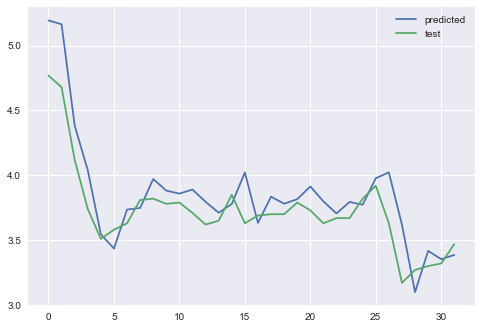

In [17]:

plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])
plt.show()



In [18]:
print(y['test'])

[[ 4.76881742]
 [ 4.67883968]
 [ 4.1189785 ]
 [ 3.7390728 ]
 [ 3.50912976]
 [ 3.57911229]
 [ 3.62910008]
 [ 3.80905533]
 [ 3.81905293]
 [ 3.77906275]
 [ 3.78906035]
 [ 3.70908022]
 [ 3.61910248]
 [ 3.64909506]
 [ 3.84904552]
 [ 3.62910008]
 [ 3.68908501]
 [ 3.69908261]
 [ 3.69908261]
 [ 3.78906035]
 [ 3.72907519]
 [ 3.62910008]
 [ 3.66909003]
 [ 3.66909003]
 [ 3.81905293]
 [ 3.91902804]
 [ 3.62910008]
 [ 3.16921401]
 [ 3.26918936]
 [ 3.2991817 ]
 [ 3.31917691]
 [ 3.46913958]]


In [19]:
print(predicted)

[ 5.19428301  5.1644001   4.38394928  4.03841925  3.54430246  3.43418336
  3.73488784  3.74738455  3.97054672  3.88116813  3.85810041  3.88923311
  3.79465342  3.71077824  3.77764678  4.02131271  3.6318593   3.83448315
  3.78011703  3.81505346  3.9132762   3.79801416  3.70498848  3.79364634
  3.77196264  3.97655344  4.02205133  3.61873078  3.09734654  3.41642261
  3.35227752  3.38451099]


In [20]:
r2_score(y['test'], predicted)

0.57619103407314043